In [210]:
from collections import OrderedDict
def uint32(v): return (v & 0xFFFFFFFF)
def uint40(v): return (v & 0xFFFFFFFFFF)

def warn(msg):
    print("WARNING", msg)

class Register:
    def __init__(self, number, hardware_name, assembly_name, bits):
        self.number = number
        self.name = hardware_name
        self.hardware_name = hardware_name
        self.assembly_name = assembly_name
        self.bits = bits
        self.data = [0] * (bits // 8)

    def copy(self, src, offset=0):
        for i,s in enumerate(src):
            self.data[i+offset] = s
            
    def __str__(self):
        if self.number >= 0:
            r = f"{self.assembly_name} [{self.hardware_name}={self.number}]"
        elif self.hardware_name != self.assembly_name and self.assembly_name is not None:
            r = f"{self.assembly_name} [{self.hardware_name}]"
        else:
            r = self.hardware_name
        return r + " " + str(self.data)
        
    @property
    def int(self):
        v = self.uint
        if v & (1<<(self.bits-1)): #0x80000000:
            v -= 1<<self.bits
        return v

    @int.setter
    def int(self, value):
        if value < -(1<<self.bits-1):
            warn("value < min when setting int" + str(self.bits))
        if value >= 1 << (self.bits-1):
            warn("value > max when setting int" + str(self.bits))
        for i in range(len(self.data)):
            self.data[i] = (value >> (i<<3)) & 0xFF
            
        v = value 
    
    @property
    def uint(self):
        return sum(d << (i << 3) for i,d in enumerate(self.data)) 

    @uint.setter
    def uint(self, value):
        if value < 0:
            warn("value < min when setting uint" + str(self.bits))
        if value >= 1 << self.bits:
            warn("value > max when setting uint" + str(self.bits))
        for i in range(len(self.data)):
            self.data[i] = (value >> (i<<3)) & 0xFF

    @property
    def u8vec(self):
        return self.data

    @u8vec.setter
    def u8vec(self, value):
        self.copy(value)

    @property
    def s8vec(self):
        s8 = []
        for i in range(0,len(self.data)):
            v = self.data[i]
            if v & 0x80: v = v - 256
            s8.append(v)
        return s8
        
    @s8vec.setter
    def s8vec(self, value):
        u8 = []
        for v in value:
            u8.append(v & 0xFF)
        self.copy(u8)

    @property
    def u16vec(self):
        u16 = []
        for i in range(0,len(self.data), 2):
            l = self.data[i]
            h = self.data[i+1]
            u16.append(l | (h << 8))
        return u16
        
    @u16vec.setter
    def u16vec(self, value):
        u8 = []
        for v in value:
            u8.append(v & 0xFF)
            u8.append((v >> 8) & 0xFF)
        self.copy(u8)

    @property
    def s16vec(self):
        s16 = []
        for i in range(0,len(self.data), 2):
            l = self.data[i]
            h = self.data[i+1]
            v = l | (h << 8)
            if v & 0x8000: v -= 65536
            s16.append(v)
        return s16
        
    @s16vec.setter
    def s16vec(self, value):
        u8 = []
        for v in value:
            u8.append(v & 0xFF)
            u8.append((v >> 8) & 0xFF)
        self.copy(u8)

    @property
    def s20vec(self):
        s20 = []
        for i in range(0,len(self.data), 5):
            ll = self.data[i]
            lh = self.data[i+1]
            hl = self.data[i+2]
            hh = self.data[i+3]
            hhh = self.data[i+4]
            v = ll | (lh << 8) | (hl << 16) | (hh << 24) | (hhh << 32)
            v0 = v & 0xFFFFF
            v1 = (v >> 20) & 0xFFFFF
            if v0 & 0x80000: v0 -= 1<<20
            if v1 & 0x80000: v1 -= 1<<20
            s20.append(v0)
            s20.append(v1)
        return s20
        
    @s20vec.setter
    def s20vec(self, value):
        u8 = []
        for i in range(len(value)):
            u8.append(v0 & 0xFF)
            u8.append((v0 >> 8) & 0xFF)
            u8.append(((v0 >> 16) & 0xF) | ((v1 << 4) & 0xF0))
            u8.append((v1 >> 4) & 0xFF)
            u8.append((v1 >> 12) & 0xFF)
        self.copy(u8)

    @property
    def u20vec(self):
        u20 = []
        for i in range(0,len(self.data), 5):
            ll = self.data[i]
            lh = self.data[i+1]
            hl = self.data[i+2]
            hh = self.data[i+3]
            hhh = self.data[i+4]
            v = ll | (lh << 8) | (lh << 16) | (hh << 24) | (hhh << 32)
            v0 = v & 0xFFFFF
            v1 = (v >> 20) & 0xFFFFF
            s20.append(v0)
            s20.append(v1)
        return s20
        
    @u20vec.setter
    def u20vec(self, value):
        u8 = []
        for i in range(len(value)):
            u8.append(v0 & 0xFF)
            u8.append((v0 >> 8) & 0xFF)
            u8.append(((v0 >> 16) & 0xF) | ((v1 << 4) & 0xF0))
            u8.append((v1 >> 4) & 0xFF)
            u8.append((v1 >> 12) & 0xFF)
        self.copy(u8)

    @property
    def u32vec(self):
        u32 = []
        for i in range(0,len(self.data), 4):
            ll = self.data[i]
            lh = self.data[i+1]
            hl = self.data[i+2]
            hh = self.data[i+3]
            u32.append(ll | (lh << 8) | (hl << 16) | (hh << 24))
        return u32
        
    @u32vec.setter
    def u32vec(self, value):
        u8 = []
        for v in value:
            u8.append(v & 0xFF)
            u8.append((v >> 8) & 0xFF)
            u8.append((v >> 16) & 0xFF)
            u8.append((v >> 24) & 0xFF)
        self.copy(u8)

    @property
    def s32vec(self):
        s32 = []
        for i in range(0,len(self.data), 4):
            ll = self.data[i]
            lh = self.data[i+1]
            hl = self.data[i+2]
            hh = self.data[i+3]
            v = ll | (lh << 8) | (hl << 16) | (hh << 24)
            if v & 0x80000000: v -= 1<<32
            s32.append(v)
        return s32
        
    @s32vec.setter
    def s32vec(self, value):
        u8 = []
        for v in value:
            u8.append(v & 0xFF)
            u8.append((v >> 8) & 0xFF)
            u8.append((v >> 16) & 0xFF)
            u8.append((v >> 24) & 0xFF)
        self.copy(u8)

    @property
    def u40vec(self):
        u40 = []
        for i in range(0,len(self.data), 5):
            ll = self.data[i]
            lh = self.data[i+1]
            hl = self.data[i+2]
            hh = self.data[i+3]
            hhh = self.data[i+4]
            u40.append(ll | (lh << 8) | (hl << 16) | (hh << 24) | (hhh << 32))
        return u40
        
    @u40vec.setter
    def u40vec(self, value):
        u8 = []
        for v in value:
            u8.append(v & 0xFF)
            u8.append((v >> 8) & 0xFF)
            u8.append((v >> 16) & 0xFF)
            u8.append((v >> 24) & 0xFF)
            u8.append((v >> 32) & 0xFF)
        self.copy(u8)

    @property
    def s40vec(self):
        s40 = []
        for i in range(0,len(self.data), 5):
            ll = self.data[i]
            lh = self.data[i+1]
            hl = self.data[i+2]
            hh = self.data[i+3]
            hhh = self.data[i+4]
            v = ll | (lh << 8) | (hl << 16) | (hh << 24) | (hhh << 32)
            if v & 0x8000000000: v -= 1<<40
            s40.append(v)
        return s40
        
    @s40vec.setter
    def s40vec(self, value):
        u8 = []
        for v in value:
            u8.append(v & 0xFF)
            u8.append((v >> 8) & 0xFF)
            u8.append((v >> 16) & 0xFF)
            u8.append((v >> 24) & 0xFF)
            u8.append((v >> 32) & 0xFF)
        self.copy(u8)

class InstructionFormat(OrderedDict):
    def __init__(self, name="---"):
        if name == "RRR": super().__init__(dict(op2=4, op1=4, r=4, s=4, t=4, op0=4))
        elif name == "RRI4": super().__init__(dict(imm4=4, op1=4, r=4, s=4, t=4, op0=4))
        elif name == "RRI8": super().__init__(dict(imm8=8, r=4, s=4, t=4, op0=4))
        elif name == "RI16": super().__init__(dict(imm16=16, t=4, op0=4))
        elif name == "RSR": super().__init__(dict(op2=4, op1=4, rs=8, t=4, op0=4))
        elif name == "CALL": super().__init__(dict(ofset=18, n=2, op0=4))
        elif name == "CALLX": super().__init__(dict(op2=4, op1=4, r=4, s=4, m=2, n=2, op0=4))
        elif name == "BRI8": super().__init__(dict(imm8=8, r=4, s=4, m=2, n=2, op0=4))
        elif name == "BRI12": super().__init__(dict(imm12=12, s=4, m=2, n=2, op0=4))
        elif name == "RRRN": super().__init__(dict(r=4, s=4, t=4, op0=4))
        elif name == "RI7": super().__init__(dict(imm7_l=4,s=4, i_imm7_h=4, op0=4))
        elif name == "RI6": super().__init__(dict(imm6_l=4, s=4, i_z_imm6_h=4, op0=4))
        else: super().__init__(dict(op0=24))
        self.name = name

class InstructionDescriptor(object):
    def __init__(self, template, format, description):
        self.template = template
        self.name, *argument_names = template.split(" ",1)
        self.argument_names = argument_names[0].replace(" ","").split(",") if argument_names else []
        self.format = format
        self.description = description
        
    def __str__(self):
        return "[" + ", ".join(self.argument_names) + "] " + self.description

class Instruction(object):
    def __init__(self, context, address, descriptor, arguments, comments):
        self.context = context
        self.address = address
        self.descriptor = descriptor
        self.arguments = arguments
        self.comments = comments
        
        if descriptor.name.startswith("!"):
            self.size = 0 
            self.virtual = True
        elif descriptor.name.endswith(".N"):
            self.size = 2
            self.virtual = False
        else:
            self.size = 3
            self.virtual = False
            
    @classmethod
    def parse(cls, context, address, line):
        line, *comments = line.split("#")
        line = line.strip()
        comments = [c.strip() for c in comments]
        
        if ":" in line:
            name = "!LABEL"
            arguments = [line.split(":")[0]]
        else:
            name, *arguments = line.split(" ",1)
            arguments = arguments[0] if arguments else ""
            arguments = arguments.replace(" ","").split(",")
            if len(arguments) == 1 and not len(arguments[0]): arguments = []
        descriptor = context.find_instruction(name.upper())
        return cls(context, address, descriptor, arguments, comments)

    def execute(self):
        i = self.context
        fn = "_" + self.descriptor.name.lower().replace(".","_").replace("!","")
        if not hasattr(i, fn):
            for o in self.context.options.values():
                if hasattr(o, fn): 
                    i=o
                    break
        assert hasattr(i, fn)
        cb = getattr(i, fn)
        assert callable(cb)
        cb(*self.arguments)
            
    def __str__(self):
        line = " ".join((self.descriptor.name, ", ".join(self.arguments)))
        return line + (" " * (32-len(line)) if len(line) < 32 else " ") + "# " + str(self.descriptor)


class InstructionSet(object):
    def __init__(self, name=""):
        self.name = name
        self.parent = None
        self.register = {}
        self.instructions = {}
            
        self.expansions = {}
        self.endianness = "le"
        self.options = {}
        self.labels = {}
        self.program = []
        self.wptr = 0
        self.vpc = 0
        
    def add_code(self, code):
        for line in code.split("\n"):
            line = line.strip()
            if not line: continue
            i = Instruction.parse(self, self.wptr, line)
            self.program.append(i)
            if i.descriptor.name == "!LABEL":
                self.labels[i.arguments[0]] = self.wptr
            self.wptr += i.size
            
    def step(self):
        pc = self.find_register("PC").uint
        assert self.vpc < len(self.program)
        instr = self.program[self.vpc]
        self.vpc += 1
        pc += instr.size
        self.find_register("PC").uint = pc
        instr.execute()
        next_pc = self.find_register("PC").uint
        if next_pc != pc:
            for i, instr in enumerate(self.program):
                if instr.address == next_pc:
                    self.vpc = i
                    break
            else:
                raise RuntimeException("No instruction at PC")        
    
    def find_instruction(self, instruction):
        while isinstance(instruction,str):
            name = instruction
            if name not in self.instructions and self.parent is not None:
                return self.parent.find_instruction(name)
            instruction = self.instructions[name]
            if isinstance(instruction, InstructionSetOption):
                return instruction.find_instruction(name)
        assert isinstance(instruction, InstructionDescriptor)
        return instruction


    def find_register(self, register):
        while isinstance(register, str):
            name = register
            if name not in self.registers and self.parent is not None:
                return self.parent.find_register(name)
            register = self.registers[name]
            if isinstance(register, InstructionSetOption):
                return register.find_register(name)
        assert isinstance(register, Register)
        return register
        
    def extend(self, option):
        option.parent = self
        self.options[option.name] = option
        
        for r in option.registers:
            if r in self.registers:
                if not isinstance(option, WindowedRegisterOption):
                    print(f"WARNING. {option} overwrites register {r}")
            self.registers[r] = option #.registers[r]
        for i in option.instructions:
            if i in self.instructions:
                print(f"WARNING. {option} overwrites instruction {i}")
            self.instructions[i] = option #.instructions[i]

        
class InstructionSetOption(InstructionSet): ...
class CoreInstructionSet(InstructionSet): 
    def __init__(self):
        super().__init__("core")
        self.registers = {
            "AR0": Register(0, "AR0", "a0", 32),
            "AR1": Register(1, "AR1", "a1", 32),
            "AR2": Register(2, "AR0", "a2", 32),
            "AR3": Register(3, "AR1", "a3", 32),
            "AR4": Register(4, "AR0", "a4", 32),
            "AR5": Register(5, "AR1", "a5", 32),
            "AR6": Register(6, "AR0", "a6", 32),
            "AR7": Register(7, "AR1", "a7", 32),
            "AR8": Register(8, "AR0", "a8", 32),
            "AR9": Register(9, "AR9", "a9", 32),
            "AR10": Register(10, "AR10", "a10", 32),
            "AR11": Register(11, "AR11", "a11", 32),
            "AR12": Register(12, "AR12", "a12", 32),
            "AR13": Register(13, "AR13", "a13", 32),
            "AR14": Register(14, "AR14", "a14", 32),
            "AR15": Register(15, "AR15", "a15", 32),
            "a0": "AR0",
            "a1": "AR1",
            "a2": "AR2",
            "a3": "AR",
            "a4": "AR4",
            "a5": "AR5",
            "a6": "AR6",
            "a7": "AR7",
            "a8": "AR8",
            "a9": "AR9",
            "a10": "AR10",
            "a11": "AR11",
            "a12": "AR12",
            "a13": "AR13",
            "a14": "AR14",
            "a15": "AR15",
            "PC": Register(-1, "PC", "PC", 32),
            "SAR": Register(-1, "SAR","SAR", 8),    
        }

        self.instructions = {
            "LABEL": InstructionDescriptor("LABEL label", InstructionFormat(), ""),
            "L8UI": InstructionDescriptor("L8UI at, as, 0..255", InstructionFormat("RRI8"), "8-bit unsigned load (8-bit offset)"),
            "L16SI": InstructionDescriptor("L16SI at, as, 0..510", InstructionFormat("RRI8"), "16-bit signed load (8-bit shifted offset)"),
            "L16UI": InstructionDescriptor("L16UI at, as, 0..510", InstructionFormat("RRI8"), "16-bit unsigned load (8-bit shifted offset)"),
            "L32I": InstructionDescriptor("L32I at, as, 0..1020", InstructionFormat("RRI8"), "32-bit load (8-bit shifted offset)"),
            "L32R": InstructionDescriptor("L32R at, label", InstructionFormat("RI16"), "32-bit load PC-relative (16-bit negative word offset)"),
            "S8I": InstructionDescriptor("S8I at, as, 0..255", InstructionFormat("RRI8"), "8-bit store (8-bit offset)"),
            "S16I": InstructionDescriptor("S16I at, as, 0..510", InstructionFormat("RRI8"), "16-bit store (8-bit shifted offset)"),
            "S32I": InstructionDescriptor("S32I at, as, 0..1020", InstructionFormat("RRI8"), "32-bit store (8-bit shifted offset)"),
            "MEMW": InstructionDescriptor("MEMW", InstructionFormat("RRR"), "Order memory accesses before with memory access after"),
            "EXTW": InstructionDescriptor("EXTW", InstructionFormat("RRR"), "Order all external effects before with all external effects after"),
            "CALLO": InstructionDescriptor("CALL0 label", InstructionFormat("CALL"), "Call subroutine, PC-relative"),
            "CALLX0": InstructionDescriptor("CALLX0 label", InstructionFormat("CALLX"), "Call subroutine, address in register"),
            "RET": InstructionDescriptor("RET", InstructionFormat("CALLX"), "Subroutine return -- jump to return address"),
            "J": InstructionDescriptor("J label", InstructionFormat("CALLX"),"Unconditional jump, PC-relative"),
            "JX": InstructionDescriptor("JX as", InstructionFormat("CALLX"), "Unconditional jump, address in register"),
            "BALL": InstructionDescriptor("BALL as, at, label", InstructionFormat("RRI8"), "Branch if all of the masked bits are set"),
            "BNALL": InstructionDescriptor("BNALL as, at, label", InstructionFormat("RRI8"),"Branch if not all of the masked bits are set"),
            "BANY": InstructionDescriptor("BANY as, at, label", InstructionFormat("RRI8"), "Branch if any of the masked bits are set"),
            "BNONE": InstructionDescriptor("BNONE as, at, label", InstructionFormat("RRI8"), "Branch if none of the masked bits are set (All Clear)"),
            "BBC": InstructionDescriptor("BBC as, at, label", InstructionFormat("RRI8"), "Branch if bit clear"),
            "BBCI": InstructionDescriptor("BBCI as, 0..31, label", InstructionFormat("RRI8"), "Branch if bit clear immediate"),
            "BBS": InstructionDescriptor("BBS as, at, label", InstructionFormat("RRI8"), "Branch if bit set"),
            "BBSI": InstructionDescriptor("BBSI as, 0..31, label", InstructionFormat("RRI8"), "Branch is bit set immediate"),
            "BEQ": InstructionDescriptor("BEQ as, at, label", InstructionFormat("RRI8"), "Branch if equal"),
            "BEQI": InstructionDescriptor("BEQI as, imm, label", InstructionFormat("BRI8"), "Branch if equal immediate"),
            "BEQZ": InstructionDescriptor("BEQZ as, label", InstructionFormat("BRI12"), "Branch is equal to zero"),
            "BNE": InstructionDescriptor("BNE as, at, label", InstructionFormat("RRI8"), "Branch if not equal"),
            "BNEI": InstructionDescriptor("BNEI as, imm, label", InstructionFormat("BRI8"), "Branch if not equal to immediate"),
            "BNEZ": InstructionDescriptor("BNEZ as, label", InstructionFormat("BRI12"), "Branch if not equal to zero"),
            "BGE": InstructionDescriptor("BGE as, at, label", InstructionFormat("RRI8"), "Branch if greater than or equal"),
            "BGEI": InstructionDescriptor("BGEI as, imm, label", InstructionFormat("BRI8"),"Branch if greater than or equal to immediate"),
            "BGEU": InstructionDescriptor("BGEU as, at, label", InstructionFormat("RRI8"), "Branch if greater than or equal unsigned"),
            "BGEUI": InstructionDescriptor("BGEUI as, imm, label", InstructionFormat("BRI8"), "Branch if greater than or equal to unsigned immediate"),
            "BGEZ": InstructionDescriptor("BGEZ as, label", InstructionFormat("BRI12"), "Branch to greater than or equal to zero"),
            "BLT": InstructionDescriptor("BLT as, at, label", InstructionFormat("RRI8"),"Branch if less than"),
            "BLTI": InstructionDescriptor("BLTI as, imm, label", InstructionFormat("BRI8"), "Branch if less than immediate"),
            "BLTU": InstructionDescriptor("BLTU as, at, label", InstructionFormat("RRI8"), "Branch if less than unsigned"),
            "BLTUI": InstructionDescriptor("BLTUI as, imm, label", InstructionFormat("BRI8"), "Branch if less than unsigned immediate"),
            "BLTZ": InstructionDescriptor("BLTZ as, label", InstructionFormat("RRI8"), "Branch if less than zero"),
            "MOVI": InstructionDescriptor("MOVI at, -2048..2047", InstructionFormat("RRI8"), "Load register with 12-bit signed constant"),
            "MOVEQZ": InstructionDescriptor("MOVEQZ ar, as, at", InstructionFormat("RRR"), "Conditional move if zero"),
            "MOVNEZ": InstructionDescriptor("MOVNEZ ar, as, at", InstructionFormat("RRR"), "Conditional move if non-zero"),
            "MOVLTZ": InstructionDescriptor("MOVLTZ ar, as, at", InstructionFormat("RRR"), "Conditional move if less than zero"),
            "MOVGEZ": InstructionDescriptor("MOVGEZ ar, as, at", InstructionFormat("RRR"), "Conditional move if greater than or equal to zero"),
            "ADD": InstructionDescriptor("ADD ar, as, at", InstructionFormat("RRR"), "Add two registers"),
            "ADDI": InstructionDescriptor("ADDI at, as, -128..127", InstructionFormat("RRI8"), "Add signed constant to register"),
            "ADDMI": InstructionDescriptor("ADDMI at, as, -32768..32512", InstructionFormat("RRI8"), "Add signed constant shifted by 8 to register"),
            "ADDX2": InstructionDescriptor("ADDX2 ar, as, at", InstructionFormat("RRR"), "Add register to register shifted by 1"),
            "ADDX4": InstructionDescriptor("ADDX4 ar, as, at", InstructionFormat("RRR"), "Add register to register shifted by 2"),
            "ADDX8": InstructionDescriptor("ADDX8 ar, as, at", InstructionFormat("RRR"), "Add register to register shifted by 3"),
            "SUB": InstructionDescriptor("SUB ar, as, at", InstructionFormat("RRR"), "Subtract two registers"),
            "SUBX2": InstructionDescriptor("SUBX2 ar, as, at", InstructionFormat("RRR"), "Subtract register from register shifted by 1"),
            "SUBX4": InstructionDescriptor("SUBX4 ar, as, at", InstructionFormat("RRR"), "Subtract register from register shifted by 2"),
            "SUBX8": InstructionDescriptor("SUBX8 ar, as, at", InstructionFormat("RRR"), "Subtract register from register shifted by 3"),
            "NEG": InstructionDescriptor("NEG ar, at", InstructionFormat("RRR"), "Negate"),
            "ABS": InstructionDescriptor("ABS ar, at", InstructionFormat("RRR"), "Absolute value"),
            "SALT": InstructionDescriptor("SALT ar, as, at", InstructionFormat("RRR"), "Set AR if less than"),
            "SALTU": InstructionDescriptor("SALTU ar, as, at", InstructionFormat("RRR"), "Set AR if less than unsigned"),
            "AND": InstructionDescriptor("AND ar, as, at", InstructionFormat("RRR"), "Bitwise logical and"),
            "OR": InstructionDescriptor("OR ar, as, at", InstructionFormat("RRR"), "Bitwise logical or"),
            "XOR": InstructionDescriptor("XOR ar, as, at", InstructionFormat("RRR"), "Bitwise logical xor"),
            "EXTUI": InstructionDescriptor("EXTUI ar, at, shiftimm, maskimm", InstructionFormat("RRR"), "Extract unsigned field immediate"),
            "SRLI": InstructionDescriptor("SRLI ar, at, 0..15", InstructionFormat("RRR"), "Shift right logical immediate"),
            "SRAI": InstructionDescriptor("SRAI ar, at, 0..15", InstructionFormat("RRR"), "Shift right arithmetic immediate"),
            "SLLI": InstructionDescriptor("SLLI ar, at, 0..15", InstructionFormat("RRR"), "Shift left logical immediate"),
            "SRC": InstructionDescriptor("SRC ar, as, at", InstructionFormat("RRR"), "Shift right combined"),
            "SLL": InstructionDescriptor("SLL ar, at", InstructionFormat("RRR"), "Shift left logical"),
            "SRL": InstructionDescriptor("SRL ar, at", InstructionFormat("RRR"), "Shift right logical"),
            "SRA": InstructionDescriptor("SRA ar, at", InstructionFormat("RRR"), "Shift right arithmetic"),
            "SSL": InstructionDescriptor("SSL as", InstructionFormat("RRR"), "Set shift amount register for shift left logical"),
            "SSR": InstructionDescriptor("SSR as", InstructionFormat("RRR"), "Set shift amount register for shift right logical"),
            "SSAI":InstructionDescriptor("SRAI ar, at, 0..31", InstructionFormat("RRR"), "Set shift amount register immediate"),
            "SSA8B":InstructionDescriptor("SSA8B as", InstructionFormat("RRR"), "Set shift amount register for big-endian byte align"),
            "SSA8L": InstructionDescriptor("SSA8L as", InstructionFormat("RRR"), "Set shift amount register for little-endian byte align"),
            "RSR": InstructionDescriptor("RSR ar, sr", InstructionFormat("RSR"), "Read special register"),
            "WSR": InstructionDescriptor("WSR at, sr", InstructionFormat("RSR"), "Write special register"),
            "XSR": InstructionDescriptor("XSR at, sr", InstructionFormat("RSR"), "Exchange special register"),
            "RUR": InstructionDescriptor("RUR ar, sr", InstructionFormat("RUR"), "Read user defined register"),
            "WUR": InstructionDescriptor("WUR at, sr", InstructionFormat("RUR"), "Write user defined register"),
            "ISYNC": InstructionDescriptor("ISYNC", InstructionFormat("RRR"), "Instruction fetch synchronize"),
            "RSYNC": InstructionDescriptor("RSYNC", InstructionFormat("RRR"), "Instruction register synchronize"),
            "ESYNC": InstructionDescriptor("ESYNC", InstructionFormat("RRR"), "Register value synchronize"),
            "DSYNC": InstructionDescriptor("DSYNC", InstructionFormat("RRR"), "Load/store synchronize"),
            "FSYNC": InstructionDescriptor("FSYNC", InstructionFormat("RRR"), "Fetch synchronize"),
            "NOP": InstructionDescriptor("NOP", InstructionFormat("RRR"), "No operation"),
            "ILL": InstructionDescriptor("ILL", InstructionFormat("RRR"), "Illegal instruction"),
            "!DUMP": InstructionDescriptor("!DUMP *ar", InstructionFormat(), "Emulator dump register"),
            "!DUMPX": InstructionDescriptor("!DUMPX *ar", InstructionFormat(), "Emulator dump register in hex format"),
            "!DUMPS": InstructionDescriptor("!DUMPS *ar", InstructionFormat(), "Emulator dump register in signed format"),
            "!DUMPU": InstructionDescriptor("!DUMPU *ar", InstructionFormat(), "Emulator dump register in unsigned format"),
            "!LABEL": InstructionDescriptor("!LABEL label", InstructionFormat(), "Label declaration (virtual)")
        }

        self.b4const = [-1,1,2,3,4,5,6,7,8,10,12,16,32,64,128,256]
        self.b4constu = [32768, 65536, 2,3,4,5,6,7,8,10,12,16,32,64,128,256]
        self.memory = [0] * (1<<23) # 8MB

    def _label(self, label):
        #print("Passing label", label)
        pass
        
    def _dump(self, *regs):
        for r in regs:
            print(r+":", self.find_register(r).data, end=" ")
        print()
        
    def _dumpx(self, *regs):
        for r in regs:
            print(r+":", "".join(f"{byte:02X}" for byte in reversed(self.find_register(r).data)), end=" ")
        print()
        
    def _dumpu(self, *regs):
        for r in regs:
            print(r+":", self.find_register(r).uint, end=" ")
        print()
        
    def _dumps(self, *regs):
        for r in regs:
            print(r+":", self.find_register(r).int, end=" ")
        print()
        
    def _abs(self, r, t):
        self.find_register(r).uint = abs(self.find_register(r).int)

    def _add(self, r, s, t):
        t = self.find_register(t).int
        s = self.find_register(s).int
        self.find_register(r).int = t + s

    def _addi(self, r, s, imm):
        self.find_register(r).int = self.find_register(s).int + int(imm)

    def _addmi(self, r, s, imm):
        self.find_register(r).int = self.find_register(s).int + int(imm)

    def _addx2(self, r, s, t):
        t = self.find_register(t).int
        s = self.find_register(s).int << 1
        self.find_register(r).int = t + s

    def _addx4(self, r, s, t):
        t = self.find_register(t).int
        s = self.find_register(s).int << 2
        self.find_register(r).int = t + s

    def _addx8(self, r, s, t):
        t = self.find_register(t).int
        s = self.find_register(s).int << 3
        self.find_register(r).int = t + s

    def _and(self, r, s, t):
        t = self.find_register(t).uint
        s = self.find_register(s).uint
        self.find_register(r).uint = t & s

    def _ball(self, s, t, label):
        t = self.find_register(t).uint
        s = self.find_register(s).uint
        if ((~s) & t) == 0:
            self.find_register("PC").uint = self.labels[label]

    def _bany(self, s, t, label):
        t = self.find_register(t).uint
        s = self.find_register(s).uint
        if (s & t) != 0:
            self.find_register("PC").uint = self.labels[label]

    def _bbc(self, s, t, label):
        t = self.find_register(t).uint & 0x1F
        s = self.find_register(s).uint
        if (s & (1<<t)) == 0:
            self.find_register("PC").uint = self.labels[label]
        
    def _bbci(self, s, imm, label):
        s = self.find_register(s).uint
        if (s & (1<<int(imm))) == 0:
            self.find_register("PC").uint = self.labels[label]

    def _bbs(self, s, t, label):
        t = self.find_register(t).uint & 0x1F
        s = self.find_register(s).uint
        if (s & (1<<t)) != 0:
            self.find_register("PC").uint = self.labels[label]
        
    def _bbsi(self, s, imm, label):
        s = self.find_register(s).uint
        if (s & (1<<int(imm))) != 0:
            self.find_register("PC").uint = self.labels[label]

    def _beq(self, s, t, label):
        t = self.find_register(t).uint
        s = self.find_register(s).uint
        if s == t:
            self.find_register("PC").uint = self.labels[label]

    def _beqi(self, s, imm, label):
        assert int(imm) in self.b4const
        s = self.find_register(s).uint
        if s == int(imm):
            self.find_register("PC").uint = self.labels[label]

    def _beqz(self, s, label):
        s = self.find_register(s).uint
        if s == 0:
            self.find_register("PC").uint = self.labels[label]

    def _bge(self, s, t, label):
        t = self.find_register(t).int
        s = self.find_register(s).int
        if s >= t:
            self.find_register("PC").uint = self.labels[label]
    
    def _bgei(self, s, imm, label):
        assert int(imm) in self.b4const
        s = self.find_register(s).int
        if s >= int(imm):
            self.find_register("PC").uint = self.labels[label]
    
    def _bgeu(self, s, t, label):
        t = self.find_register(t).uint
        s = self.find_register(s).uint
        if s >= t:
            self.find_register("PC").uint = self.labels[label]
    
    def _bgeui(self, s, imm, label):
        assert int(imm) in self.b4constu
        s = self.find_register(s).uint
        if s >= int(imm):
            self.find_register("PC").uint = self.labels[label]
    
    def _bgez(self, s, label):
        s = self.find_register(s).int
        if s >= 0:
            self.find_register("PC").uint = self.labels[label]

    def _blt(self, s, t, label):
        t = self.find_register(t).int
        s = self.find_register(s).int
        if s < t:
            self.find_register("PC").uint = self.labels[label]

    def _blti(self, s, imm, label):
        assert int(imm) in self.b4const
        s = self.find_register(s).int
        if s < int(imm):
            self.find_register("PC").uint = self.labels[label]

    def _bltu(self, s, t, label):
        t = self.find_register(t).uint
        s = self.find_register(s).uint
        if s < t:
            self.find_register("PC").uint = self.labels[label]

    def _bltui(self, s, imm, label):
        assert im in self.b4constu
        s = self.find_register(s).uint
        if s < int(imm):
            self.find_register("PC").uint = self.labels[label]

    def _bltz(self, s, label):
        s = self.find_register(s).int
        if s < 0:
            self.find_register("PC").uint = self.labels[label]

    def _bnall(self, s, t, label):
        t = self.find_register(t).uint
        s = self.find_register(s).uint
        if ((~s) & t) != 0:
            self.find_register("PC").uint = self.labels[label]

    def _bne(self, s, t, label):
        t = self.find_register(t).uint
        s = self.find_register(s).uint
        if s != t:
            self.find_register("PC").uint = self.labels[label]

    def _bnei(self, s, imm, label):
        assert int(imm) in self.b4const
        s = self.find_register(s).uint
        if s != int(imm):
            self.find_register("PC").uint = self.labels[label]
    
    def _bnez(self, s, label):
        s = self.find_register(s).uint
        if s != 0:
            self.find_register("PC").uint = self.labels[label]

    def _bnone(self, s, t, label):
        t = self.find_register(t).uint
        s = self.find_register(s).uint
        if (s & t) == 0:
            self.find_register("PC").uint = self.labels[label]

    def _extui(self, r, t, shiftimm, maskimm):
        t = self.find_register(t).uint >> int(shiftimm)
        m = 0xFFFFFFFF >> (32-int(maskimm))
        self.find_register(r).uint = t & m

    def _extw(self):
        pass
        
    def _l8ui(self, t, s, offset):
        addr = self.find_register(s).uint + int(offset)
        self.find_register(t).uint = self.memory[addr]
        
    def _l16si(self, t, s, offset):
        addr = self.find_register(s).uint + int(offset)
        s16 = self.memory[addr] + (self.memory[addr+1]<<8)
        if s16 & 0x8000: s16 |= 0xFFFF0000
        self.find_register(t).uint = s16
        
    def _l16ui(self, t, s,  offset):
        addr = self.find_register(s).uint + int(offset)
        u16 = self.memory[addr] + (self.memory[addr+1]<<8)
        self.find_register(t).uint = u16
        
    
    def _l32i(self, t, s, offset):
        addr = self.find_register(s).uint + int(offset)
        i32 = sum(self.memory[addr+i]<<(i<<3) for i in range(4))
        self.find_register(t).uint = i32
        
    def _l32r(self, t, label):
        assert False # code and memory separate atm

    def _memw(self): pass

    def _mov(self, r, s):
        self._or(r,s,s)

    def _moveqz(self, r, s, t):
        if self.find_register(t).uint == 0:
            self._mov(r,s)

    def _movgez(self, r, s, t):
        if self.find_register(t).int >= 0:
            self._mov(r,s)

    def _movi(self, t, imm):
        self.find_register(t).int = int(imm)

    def _movltz(self, r, s, t):
        if self.find_regster(t).int < 0:
            self._mov(r,s)

    def _movnez(self, r, s, t):
        if self.find_register(t).int != 0:
            self._mov(r,s)

    def _mull(self, r, s, t):
        t = self.find_register(t).uint
        s = self.find_register(s).uint
        self.find_register(r).uint = (t * s) & 0xFFFFFFFF

    def _neg(self, r, t):
        self.find_register(r).int = - self.find_register(t).int

    def _or(self, r, s, t):
        t = self.find_register(t).uint
        s = self.find_register(s).uint
        self.find_register(r).uint = (t | s)

    def _rsr(self, t, sr):
        self.find_register(t).uint = self.find_register(sr).uint

    def _rur(self, t, sr):
        self.find_register(t).uint = self.find_register(sr).uint

    def _s8i(self, t, s, offset):
        address = self.find_register(s).uint + int(offset)
        self.memory[address] = self.find_register(t).uint & 0xFF
    
    def _s16i(self, t, s, offset):
        address = self.find_register(s).uint + int(offset)
        i16 = self.find_register(t).uint & 0xFFFF
        self.memory[address] = i16 & 0xFF
        self.memory[address+1] = (i16 >> 8) & 0xFF

    def _s32i(self, t, s, offset):
        address = self.find_register(s).uint + int(offset)
        i16 = self.find_register(t).uint & 0xFFFFFFFF
        self.memory[address] = i16 & 0xFF
        self.memory[address+1] = (i16 >> 8) & 0xFF
        self.memory[address+2] = (i16 >> 16) & 0xFF
        self.memory[address+3] = (i16 >> 24) & 0xFF

    def _salt(self, r, s, t):
        t = self.find_register(t).int
        s = self.find_register(s).int
        self.find_register(r).uint = 1 if (s < t) else 0
    
    def _saltu(self, r, s, t):
        t = self.find_register(t).uint
        s = self.find_register(s).uint
        self.find_register(r).uint = 1 if (s < t) else 0

    def _sll(self, r, s):
        sa = self.find_register("SAR").uint
        assert sa <= 32
        s = self.find_register(s).uint << (32-sa)
        s = s & 0xFFFFFFFF
        self.find_register(r).uint = s

    def _slli(self, r, s, imm):
        s = self.find_register(s).uint << int(imm)
        s = s & 0xFFFFFFFF
        self.find_register(r).uint = s

    def _sra(self, r, t):
        sa = self.find_register("SAR").uint
        assert sa <= 32
        t = self.find_register(t).int >> (sa)
        t = t & 0xFFFFFFFF
        self.find_register(r).uint = t

    def _src(self, r, s, t):
        sa = self.find_register("SAR").uint
        assert sa <= 32
        t = self.find_register(t).int
        s = self.find_register(s).int
        v = ((s << 32) | t) >> sa
        v = v & 0xFFFFFFFF
        self.find_register(r).uint = v
    
    def _srl(self, r, t):
        sa = self.find_register("SAR").uint
        assert sa <= 32
        t = self.find_register(t).uint >> (sa)
        t = t & 0xFFFFFFFF
        self.find_register(r).uint = t

    def _srli(self, r, t, imm):
        t = self.find_register(t).uint >> int(imm)
        self.find_register(r).uint = t

    def _ssa8b(self, s):
        self.find_register("SAR").uint = 32 - ((self.find_register(s).uint & 3) << 3)

    def _ssa8l(self, s):
        self.find_register("SAR").uint = (self.find_register(s).uint & 3) << 3

    def _ssai(self, imm):
        self.find_register("SAR").uint = int(imm)

    def _ssl(self, s):
        s = self.find_register(s).uint
        self.find_register("SAR").uint = 32 - (s & 0x1F)

    def _ssr(self, s):
        s = self.find_register(s).uint
        self.find_register("SAR").uint = s & 0x1F

    def _sub(self, r,s,t):
        t = self.find_register(t).int
        s = self.find_register(s).int
        self.find_register(r).int = s - t

    def _subx2(self, r,s,t):
        t = self.find_register(t).int
        s = self.find_register(s).int << 1
        self.find_register(r).int = s - t
    
    def _subx4(self, r,s,t):
        t = self.find_register(t).int
        s = self.find_register(s).int << 2
        self.find_register(r).int = s - t

    def _subx8(self, r,s,t):
        t = self.find_register(t).int
        s = self.find_register(s).int << 3
        self.find_register(r).int = s - t

    def _wsr(self, t, sr):
        self.find_register(sr).uint = self.find_register(t).uint

    def _wur(self, t, sr):
        self.find_register(sr).uint = self.find_register(t).uint

    def _xor(self, r, s, t):
        t = self.find_register(t).uint
        s = self.find_register(s).uint
        self.find_register(r).uint = s ^ t

    def _xsr(self, t, sr):
        v = self.find_register(t).uint
        self.find_register(t).uint = self.find_register(sr).uint
        self.find_register(sr).uint = v
        
    def _isync(self): pass
    def _rsync(self): pass
    def _esync(self): pass
    def _dsync(self): pass
    def _fsync(self): pass
    def _nop(self): pass
        
    def _j(self, label):
        self.find_register("PC").uint = self.labels[label]

    def _jx(self, ar):
        self.find_register("PC").uint = self.find_register(ar).uint

    def _call0(self, label):
        self.find_register("a0").uint = self.find_register("PC").uint
        self.find_register("PC").uint = self.labels[label]

    def _callx0(self, ar):
        dst = self.find_register(ar).uint
        self.find_register("a0").uint = self.find_register("PC").uint
        self.find_register("PC").uint = dst
        
    def _ret(self):
        self._jx("a0")
        
class MAC16Option(InstructionSetOption):
    def __init__(self):
        super().__init__("mac16")
        self.registers = {
            "ACCHI": [0,0,0,0],
            "ACCLO": [0],
            "MR[0]": [0,0,0,0],
            "MR[1]": [0,0,0,0],
            "MR[2]": [0,0,0,0],
            "MR[3]": [0,0,0,0],
            "m0": "MR[0]",
            "m1": "MR[1]",
            "m2": "MR[2]",
            "m3": "MR[3]"
        }
        
        self.instructions = {
            "LDDEC": ["RRR", "Load MAC16 data register (MR) with auto decrement"],
            "LDINC": ["RRR", "Load MAC16 data register (MR) with auto increment"],
            "MUL.AA.qq": ["RRR", "Signed multiply of two address registers"],
            "MUL.AD.qq": ["RRR", "Signed multiply of an address register and a MAC16 data register"],
            "MUL.DA.qq": ["RRR", "Signed multiply of a MAC16 data register and an address register"],
            "MUL.DD.qq": ["RRR", "Signed multiply of two MAC16 data registers"],
            "MULA.AA.qq": ["RRR", "Signed multiply-accumulate of two address registers"],
            "MULA.AD.qq": ["RRR", "Signed multiply-accumulate of an address register and a MAC16 data register"],
            "MULA.DA.qq": ["RRR", "Signed multiply-accumulate of a MAC16 data register and an address register"],
            "MULA.DD.qq": ["RRR", "Signed multiply-accumulate of two MAC16 data registers"],
            "MULS.AA.qq": ["RRR", "Signed multiply/subtract of two address registers"],
            "MULS.AD.qq": ["RRR", "Signed multiply/subtract of an address register and a MAC16 data register"],
            "MULS.DA.qq": ["RRR", "Signed multiply/subtract of a MAC16 data register and an address register"],
            "MULS.DD.qq": ["RRR", "Signed multiply/subtract of two MAC16 data registers"],
            "MULA.DA.qq.LDDEC": ["RRR", "Signed multiply-accumulate of a MAC16 data register and an address register, and load a MAC16 data register with auto decrement"],
            "MULA.DA.qq.LDINC": ["RRR", "Signed multiply-accumulate of a MAC16 data register and an address register, and load a MAC16 data register with auto increment"],
            "MULA.DD.qq.LDDEC": ["RRR", "Signed multiply-accumulate of two MAC16 data registers, and load a MAC16 data register with auto decrement"],
            "MULA.DD.qq.LDINC": ["RRR", "Signed multiply-accumulate of two MAC16 data registers, and load a MAC16 data register with auto increment"],
            "UMUL.AA.qq": ["RRR", "Unsigned multiply of two address registers"],
        }

        self.expansions = {
            "qq": ["LL","HL","LH","HH"],
        }

class WindowedRegisterOption(InstructionSetOption):
    def __init__(self):
        super().__init__("windowed_register")
        self.registers = {
            "_AR0": Register(-1, "_AR0", None, 32),
            "_AR1": Register(-1, "_AR1", None, 32),
            "_AR2": Register(-1, "_AR2", None, 32),
            "_AR3": Register(-1, "_AR3", None, 32),
            "_AR4": Register(-1, "_AR4", None, 32),
            "_AR5": Register(-1, "_AR5", None, 32),
            "_AR6": Register(-1, "_AR6", None, 32),
            "_AR7": Register(-1, "_AR7", None, 32),
            "_AR8": Register(-1, "_AR8", None, 32),
            "_AR9": Register(-1, "_AR9", None, 32),
            "_AR10": Register(-1, "_AR10", None, 32),
            "_AR11": Register(-1, "_AR11", None, 32),
            "_AR12": Register(-1, "_AR12", None, 32),
            "_AR13": Register(-1, "_AR13", None, 32),
            "_AR14": Register(-1, "_AR14", None, 32),
            "_AR15": Register(-1, "_AR15", None, 32),
            "_AR16": Register(-1, "_AR16", None, 32),
            "_AR17": Register(-1, "_AR17", None, 32),
            "_AR18": Register(-1, "_AR18", None, 32),
            "_AR19": Register(-1, "_AR19", None, 32),
            "_AR20": Register(-1, "_AR20", None, 32),
            "_AR21": Register(-1, "_AR21", None, 32),
            "_AR22": Register(-1, "_AR22", None, 32),
            "_AR23": Register(-1, "_AR23", None, 32),
            "_AR24": Register(-1, "_AR24", None, 32),
            "_AR25": Register(-1, "_AR25", None, 32),
            "_AR26": Register(-1, "_AR26", None, 32),
            "_AR27": Register(-1, "_AR27", None, 32),
            "_AR28": Register(-1, "_AR28", None, 32),
            "_AR29": Register(-1, "_AR29", None, 32),
            "_AR30": Register(-1, "_AR30", None, 32),
            "_AR31": Register(-1, "_AR31", None, 32),
            "_AR32": Register(-1, "_AR32", None, 32),
            "_AR33": Register(-1, "_AR33", None, 32),
            "_AR34": Register(-1, "_AR34", None, 32),
            "_AR35": Register(-1, "_AR35", None, 32),
            "_AR36": Register(-1, "_AR36", None, 32),
            "_AR37": Register(-1, "_AR37", None, 32),
            "_AR38": Register(-1, "_AR38", None, 32),
            "_AR39": Register(-1, "_AR39", None, 32),
            "_AR40": Register(-1, "_AR40", None, 32),
            "_AR41": Register(-1, "_AR41", None, 32),
            "_AR42": Register(-1, "_AR42", None, 32),
            "_AR43": Register(-1, "_AR43", None, 32),
            "_AR44": Register(-1, "_AR44", None, 32),
            "_AR45": Register(-1, "_AR45", None, 32),
            "_AR46": Register(-1, "_AR46", None, 32),
            "_AR47": Register(-1, "_AR47", None, 32),
            "_AR48": Register(-1, "_AR48", None, 32),
            "_AR49": Register(-1, "_AR49", None, 32),
            "_AR50": Register(-1, "_AR50", None, 32),
            "_AR51": Register(-1, "_AR51", None, 32),
            "_AR52": Register(-1, "_AR52", None, 32),
            "_AR53": Register(-1, "_AR53", None, 32),
            "_AR54": Register(-1, "_AR54", None, 32),
            "_AR55": Register(-1, "_AR55", None, 32),
            "_AR56": Register(-1, "_AR56", None, 32),
            "_AR57": Register(-1, "_AR57", None, 32),
            "_AR58": Register(-1, "_AR58", None, 32),
            "_AR59": Register(-1, "_AR59", None, 32),
            "_AR60": Register(-1, "_AR60", None, 32),
            "_AR61": Register(-1, "_AR61", None, 32),
            "_AR62": Register(-1, "_AR62", None, 32),
            "_AR63": Register(-1, "_AR63", None, 32),
            "AR0": "_AR0",
            "AR1": "_AR1",
            "AR2": "_AR2",
            "AR3": "_AR3",
            "AR4": "_AR4",
            "AR5": "_AR5",
            "AR6": "_AR6",
            "AR7": "_AR7",
            "AR8": "_AR8",
            "AR9": "_AR9",
            "AR10": "_AR10",
            "AR11": "_AR11",
            "AR12": "_AR12",
            "AR13": "_AR13",
            "AR14": "_AR14",
            "AR15": "_AR15",
            "WindowBase": Register(-1, "WindowBase", "WindowBase", 8),
            "WindowStart": Register(-1,"WindowStart", "WindowStart",8),
            "PS.CALLINC": Register(-1, "PS.CALLINC", "PS.CALLINC", 8),
            "PS.OWB": Register(-1, "PS.OWB", "PS.OWB", 8),
            "PS.WOE": Register(-1, "PS.WOE", "PS.WOE", 8),
        }

        self.instructions = {
            "MOVSP": InstructionDescriptor("MOVSP at, as", InstructionFormat("RRR"), "Atomic check window and move"),
            "CALL4": InstructionDescriptor("CALL4 label", InstructionFormat("CALLX"), "Call subroutine, PC-relative, hide four registers"),
            "CALL8": InstructionDescriptor("CALL8 label", InstructionFormat("CALLX"), "Call subroutine, PC-relative, hide eight registers"),
            "CALL12": InstructionDescriptor("CALL12 label", InstructionFormat("CALLX"), "Call subroutine, PC-relative, hide twelve registers"),
            "CALLX4": InstructionDescriptor("CALLX4 as", InstructionFormat("CALLX"), "Call subroutine, address in register, hide four registers"),
            "CALLX8": InstructionDescriptor("CALLX8 as", InstructionFormat("CALLX"), "Call subroutine, address in register, hide eight registers"),
            "CALLX12": InstructionDescriptor("CALLX12 as", InstructionFormat("CALLX"), "Call subroutine, address in register, hide twelve registers"),
            "ENTRY": InstructionDescriptor("ENTRY as, 0..32760", InstructionFormat("BRI12"), "Subroutine entry, rotate registers, adjust stack pointer"),
            "RETW": InstructionDescriptor("RETW", InstructionFormat("CALLX"), "Subroutine return, unrotate registers, jump to return address"),
            "RETW.N": InstructionDescriptor("RETW.N", InstructionFormat("CALLX"), "Subroutine return, unrotate registers, jump to return address (16-bit encoding)"),
            "ROTW": InstructionDescriptor("ROTW -8..7", InstructionFormat("RRR"), "Rotate window by a constant"),
            "L32E": InstructionDescriptor("L32E at, as, -64..-4", InstructionFormat("RRI4"), "Load 32 bits for window exception"),
            "S32E": InstructionDescriptor("S32E at, as, -64..-4", InstructionFormat("RRI4"), "Store 32 bits for window exception"),
            "RFWO": InstructionDescriptor("RFWO", InstructionFormat("RRR"), "Return from window overflow exception"),
            "RFWU": InstructionDescriptor("RFWU", InstructionFormat("RRR"), "Return from window underflow exception"),
        }
    
    def _entry(self, imm12, s):
        assert s >= 0 and s <= 3
        
        callinc = self.find_register("PS.CALLINC").uint
        window_base = self.find_register("WindowBase").uint
        window_start = self.find_register("WindowStart").uint
        window_start |= 1 << window_base
        self.find_register("WindowBase").uint = window_base + (callinc << 2)
        self.find_register("WindowStart").uint = window_start
        
        sp_reg = "AR" + str(s)
        sp_val = self.find_register(sp_reg).uint
        self.find_register(sp_reg).uint = sp_val - imm12
        for i in range(16):
            dst = i + window_base
            self.registers["AR" + str(i)] = ("_AR" + str(dst)) if dst < 64 else None
        self.find_register(sp_reg).uint = sp_val
        a0 = self.find_register("AR0").uint
        self.find_register("AR0").uint =  (a0 & 0x3FFFFFFF) | (callinc << 30)
        return self

    def _retw(self):
        # TODO window overflow / underflow + exceptions
        pc = self.find_register("PC").uint
        ws = self.find_register("WindowStart").uint
        address = self.find_register("AR0").uint
        callinc = (address >> 30) & 0x3
        address = (address & 0x3FFFFFFF) | (pc & 0xC0000000)
        window_base = self.find_register("WindowBase").uint
        self.find_register("WindowBase").uint = window_base - (callinc << 2)
        for i in range(16):
            dst = i + window_base
            self.registers["AR" + str(i)] = ("_AR" + str(dst)) if dst < 64 else None
        if ws & (1<<window_base):
            ws &= ~(1<<window_base)
            self.find_register("WindowStart").uint =  ws
            self.find_register("PS.CALLINC").uint = callinc
            self.find_register("PC").uint = address
        
class MiscellaneousOperationsOption(InstructionSetOption):
    def __init__(self):
        super().__init__("miscellaneous")
        self.registers = {}
        self.instructions = {
            "CLAMPS": ["RRR", "Clamp to signed power of two range"],
            "MAX": ["RRR", "Max value signed"],
            "MAXU": ["RRR", "Max value unsigned"],
            "MIN": ["RRR", "Min value signed"],
            "MINU": ["RRR", "Min value signed"],
            "NSA": ["RRR", "Normalization shift amount signed"],
            "NSAU": ["RRR", "Normalization shift amount unsigned"],
            "SEXT": ["RRR", "Sign extend"]
        }


    def _max(self, r, s, t):
        t = self.find_register(t).int
        s = self.find_register(s).int
        self.find_register(r).int = max(s,t)

    def _maxu(self, r, s, t):
        t = self.find_register(t).uint
        s = self.find_register(s).uint
        self.find_register(r).uint = max(s,t)

    def _min(self, r, s, t):
        t = self.find_register(t).int
        s = self.find_register(s).int
        self.find_register(r).int = min(s,t)

    def _minu(self, r, s, t):
        t = self.find_register(t).uint
        s = self.find_register(s).uint
        self.find_register(r).uint = min(s,t)


class FloatingPointCoprocessorOption(InstructionSetOption):
    def __init__(self, double_precision=True):
        super().__init__("floating_point_coprocessor")
        self.registers = {
            "FR0": [0,0,0,0,0,0,0,0] if double_precision else [0,0,0,0],
            "FR1": [0,0,0,0,0,0,0,0] if double_precision else [0,0,0,0],
            "FR2": [0,0,0,0,0,0,0,0] if double_precision else [0,0,0,0],
            "FR3": [0,0,0,0,0,0,0,0] if double_precision else [0,0,0,0],
            "FR4": [0,0,0,0,0,0,0,0] if double_precision else [0,0,0,0],
            "FR5": [0,0,0,0,0,0,0,0] if double_precision else [0,0,0,0],
            "FR6": [0,0,0,0,0,0,0,0] if double_precision else [0,0,0,0],
            "FR7": [0,0,0,0,0,0,0,0] if double_precision else [0,0,0,0],
            "FR8": [0,0,0,0,0,0,0,0] if double_precision else [0,0,0,0],
            "FR9": [0,0,0,0,0,0,0,0] if double_precision else [0,0,0,0],
            "FR10": [0,0,0,0,0,0,0,0] if double_precision else [0,0,0,0],
            "FR11": [0,0,0,0,0,0,0,0] if double_precision else [0,0,0,0],
            "FR12": [0,0,0,0,0,0,0,0] if double_precision else [0,0,0,0],
            "FR13": [0,0,0,0,0,0,0,0] if double_precision else [0,0,0,0],
            "FR14": [0,0,0,0,0,0,0,0] if double_precision else [0,0,0,0],
            "FR15": [0,0,0,0,0,0,0,0] if double_precision else [0,0,0,0],
            "FCR": [0,0,0,0],
            "FSR": [0,0,0,0],
        }

        self.instructions = {
            "ABS.p": ["RRR", "Absolute value", [0b1111, "p", "fr","fs", 0b0001, 0b0000]],
            "ADD.p": ["RRR", "Add", [0b0000, "p", "fr","fs","ft", 0b0000]],
            "ADDEXP.p": ["RRR", "Add exponent", [0b1111, "p","fr","fs",0b1110, 0b0000]],
            "ADDEXPM.p": ["RRR", "Add exponent from mantissa segment", [0b1111, "p", "fr","fs",0b1111,0b0000]],
            "CEIL.p": ["RRR", "Floating-point to signed integer conversion with round to +inf"],
            "CONST.p": ["RRR", "Create floating-point constant"],
            "DIV0.p": ["RRR", "IEEE divide initial step"],
            "DIVN.p": ["RRR", "IEEE divide final step"],
            "FLOAT.p": ["RRR", "Signed integer to floating-point conversion (current rounding mode"],
            "FLOOR.p": ["RRR", "Floating-point to signed integer conversion with round to -inf"],
            "LpI": ["RRI8", "Load immediate"],
            "LpIP": ["RRI8", "Load immediate with base post-increment"],
            "LpX": ["RRR", "Load indexed"],
            "LpXP": ["RRR", "Load with base post-increment"],
            "MADD.p": ["RRR", "Multiply-add"],
            "MADDN.p": ["RRR", "Multiply-add with round mode override to round-to-nearest"],
            "MKDADJ.p": ["RRR", "Make divide adjust amounts"],
            "MKSADJ.p": ["RRR", "Make square-root adjust amounts"],
            "MOV.p": ["RRR", "Move"],
            "MOVEQZ.p": ["RRR", "Move if equal to zero"],
            "MOVF.p": ["RRR", "Move if boolean condition false"],
            "MOVGEZ.p": ["RRR", "Move if greater than or equal to zero"],
            "MOVLTZ.p": ["RRR", "Move if less than zero"],
            "MOVNEZ.p": ["RRR", "Move if not equal to zero"],
            "MOVT.p": ["RRR", "Move if boolean condition true"],
            "MSUB.p": ["RRR", "Multiply-subtract"],
            "MUL.p": ["RRR", "Multiply"],
            "NEG.p": ["RRR", "Negate"],
            "NEXP01.p": ["RRR", "Narrow exponent"],
            "OEQ.p": ["RRR", "Compare equal"],
            "OLE.p": ["RRR", "Compare less than or equal"],
            "OLT.p": ["RRR", "Compare less than"],
            "RECIP0.p": ["RRR", "Reciprocal initial step"],
            "RFR": ["RRR", "Read floating-point register (FR to AR)"],
            "ROUND.p": ["RRR", "Floating-point to signed integer conversion with round to nearest"],
            "RSQRT0.p": ["RRR", "Reciprocal square root initial step"],
            "RUR.FCR": ["RRR", "Read floating-point control register (to AR)"],
            "RUR.FSR": ["RRR", "Read floating-point status register (to AR)"],
            "SQRT0.p": ["RRR", "Square root initial step"],
            "SSI": ["RRI8", "Store immediate"],
            "SSIP": ["RRI8", "Store immidiate with base post-increment"],
            "SSX": ["RRR", "Store indexed"],
            "SSXP": ["RRR", "Store indexed with base post-increment"],
            "SUB.p": ["RRR", "Subtract"],
            "TRUNC.p": ["RRR", "Floating-point to signed integer conversion with round to 0"],
            "UEQ.p": ["RRR", "Compare unordered or equal"],
            "UFLOAT.p": ["RRR", "Unsigned integer to floating-point conversion (current rounding mode"],
            "ULE.p": ["RRR", "Compare unordered or less than or equal"],
            "ULT.p": ["RRR", "Compare unordered or less than"],
            "UN.p": ["RRR", "Compare unordered"],
            "UTRUNC.p": ["RRR", "Floating-point to unsigned integer conversion with round to 0"],
            "WFR": ["RRR", "Write floating-point register (AR to FR)"],
            "RUR.FCR": ["RRR", "Write floating-point control register"],
            "RUR.FSR": ["RRR", "Write floating-point status register"],
            # double precision only
            "CVTD.S": ["RRR", "Convert single-precision to double-precision"],
            "CVTS.D": ["RRR", "Convert double-precision to single-precision"],
            "RFRD": ["RRR", "Read floating-point register upper (FR to AR)"],
        }

        self.expansions = {
            "p": { "S": 0b1010, "D":0b1111 } 
        }

class ESP32S3ExtensionOption(InstructionSetOption):
    def __init__(self):
        super().__init__("esp32s3_extension")
        self.registers = {
            "QR0": Register(0, "QR0", "q0", 128),
            "QR1": Register(1, "QR1", "q1", 128),
            "QR2": Register(2, "QR2", "q2", 128),
            "QR3": Register(3, "QR3", "q3", 128),
            "QR4": Register(4, "QR4", "q4", 128),
            "QR5": Register(5, "QR5", "q5", 128),
            "QR6": Register(6, "QR6", "q6", 128),
            "QR7": Register(7, "QR7", "q7", 128),
            "q0": "QR0",
            "q1": "QR1",
            "q2": "QR2",
            "q3": "QR3",
            "q4": "QR4",
            "q5": "QR5",
            "q6": "QR6",
            "q7": "QR7",
            "SAR_BYTE": Register(-1, "SAR_BYTE","SAR_BYTE", 8), # 4 bit actually
            "ACCX": Register(-1, "ACCX", "ACCX", 40),
            "QACC_H": Register(-1, "QACC_H", "QACC_H", 160),
            "QACC_L": Register(-1, "QACC_L", "QACC_L", 160),
            "FFT_BIT_WIDTH": Register(-1, "FFT_BIT_WIDTH", "FFT_BIT_WIDTH", 8), # 4 bit actually
            "UA_STATE": Register(-1, "QACC_H", "QACC_H", 128),
        }

        self.instructions = {
            "LD.QR": InstructionDescriptor("LD.QR qu, as, -128..112",InstructionFormat("EE"), "Load 16-byte data to QR"),
            "EE.VLD.128.IP": InstructionDescriptor("EE.VLD.128.IP qu, as, -2048..2032", InstructionFormat("EE"), "Vector load 128 bit from memory"),
            "EE.VLD.128.XP": InstructionDescriptor("EE.VLD.128.XP qu, as, ad", InstructionFormat("EE"), "Vector load 128 bit from memory"),
            
            "EE.VLD.H.64.IP": InstructionDescriptor("EE.VLD.H.64.IP qu, as, -1024..1016", InstructionFormat("EE"), "Vector load 64 bit into memory (high)"),
            "EE.VLD.H.64.XP": InstructionDescriptor("EE.VLD.H.64.XP qu, as, ad", InstructionFormat("EE"), "Vector load 64 bit into memory (high)"),
            "EE.VLD.L.64.IP": InstructionDescriptor("EE.VLD.H.64.IP qu, as, -1024..1016", InstructionFormat("EE"), "Vector load 64 bit into memory (low)"),
            "EE.VLD.L.64.XP": InstructionDescriptor("EE.VLD.H.64.XP qu, as, ad", InstructionFormat("EE"), "Vector load 64 bit into memory (low)"),
            
            "EE.VLDBC.8": InstructionDescriptor("EE.VLDBC.8 qu, as", InstructionFormat("EE"), "Load and broadcast 8 bit from memory"),
            "EE.VLDBC.8.IP": InstructionDescriptor("EE.VLDBC.8.IP qu, as, 0..254", InstructionFormat("EE"), "Load and broadcast 8 bit from memory"),
            "EE.VLDBC.8.XP": InstructionDescriptor("EE.VLDBC.8.XP qu, as, ad", InstructionFormat("EE"), "Load and broadcast 8 bit from memory"),
            "EE.VLDBC.16": InstructionDescriptor("EE.VLDBC.16 qu, as", InstructionFormat("EE"), "Load and broadcast 16 bit from memory"),
            "EE.VLDBC.16.IP": InstructionDescriptor("EE.VLDBC.16.IP qu, as, 0..254", InstructionFormat("EE"), "Load and broadcast 16 bit from memory"),
            "EE.VLDBC.16.XP": InstructionDescriptor("EE.VLDBC.16.XP qu, as, ad", InstructionFormat("EE"), "Load and broadcast 16 bit from memory"),
            "EE.VLDBC.32": InstructionDescriptor("EE.VLDBC.32 qu, as", InstructionFormat("EE"), "Load and broadcast 32 bit from memory"),
            "EE.VLDBC.32.IP": InstructionDescriptor("EE.VLDBC.32.IP qu, as, 0..254", InstructionFormat("EE"), "Load and broadcast 32 bit from memory"),
            "EE.VLDBC.32.XP": InstructionDescriptor("EE.VLDBC.32.XP qu, as, ad", InstructionFormat("EE"), "Load and broadcast 32 bit from memory"),
            
            "EE.VLDHBC.16.INCP": InstructionDescriptor("EE.VLDHBC.16.INCP qu qu1, as", InstructionFormat("EE"), "Load 128 bit data from memory, extend to 256 bit and assing to registers qu, qu1"),
            "EE.LDF.m.p": [],
            "EE.LD.128.USAR.p": [],
            "EE.LDQA.usn16.128.p": [],
            "EE.LD.QACC_hl.z.IP": [],
            "EE.LD.ACCX.IP": [],
            "EE.LD.UA_STATE.IP": [],
            "EE.LDXQ.32": [],
            "ST.QR": InstructionDescriptor("ST.QR qs, as, -128..112", InstructionFormat("EE"), "Store 16 byte data from qr to memory"),
            "EE.VST.128.p": [],
            "EE.VST.hl.64.p": [],
            "EE.STF.m.p": [],
            "EE.ST.QACC_hl.z.IP": [],
            "EE.ST.ACCX.IP": [],
            "EE.ST.UA_STATE.IP": [],
            "EE.STXQ.32": [],
            "MV.QR": InstructionDescriptor("MV.QR qu, qs", InstructionFormat("EE"), "Move data from source qs to destination qu register"),
            "EE.MOVI.32.A": [],
            "EE.MOVI.32.Q": [],
            "EE.VZIP.8": InstructionDescriptor("EE.VZIP.8 qs0, sq1", InstructionFormat("EE"), "Zip algorithm"),
            "EE.VZIP.16": InstructionDescriptor("EE.VZIP.16 qs0, sq1", InstructionFormat("EE"), "Zip algorithm"),
            "EE.VZIP.32": InstructionDescriptor("EE.VZIP.32 qs0, sq1", InstructionFormat("EE"), "Zip algorithm"),
            "EE.VUNZIP.8": InstructionDescriptor("EE.VUNZIP.8 qs0, qs1", InstructionFormat("EE"), "Unzip algorithm"),
            "EE.VUNZIP.16": InstructionDescriptor("EE.VUNZIP.16 qs0, qs1", InstructionFormat("EE"), "Unzip algorithm"),
            "EE.VUNZIP.32": InstructionDescriptor("EE.VUNZIP.32 qs0, qs1", InstructionFormat("EE"), "Unzip algorithm"),
            "EE.ZERO.Q": InstructionDescriptor("EE.ZERO.Q qu", InstructionFormat("EE"), "Set Q register to zero"),
            "EE.ZERO.QACC": InstructionDescriptor("EE.ZERO.ACCX", InstructionFormat("EE"), "Set QACC to zero"),
            "EE.ZERO.ACCX": InstructionDescriptor("EE.ZERO.ACCX", InstructionFormat("EE"), "Set ACCX to zero"),
            "EE.MOV.usn16.QACC": [],
            
            "EE.VADDS.S8": InstructionDescriptor("EE.VADDS.S8 qa, qx, qy", InstructionFormat("EE"), "Vector addition (saturate)"),
            "EE.VADDS.S8.LD.INCP": InstructionDescriptor("EE.VADDS.S8.LD.INCP qu, as, qa, qx, qy", InstructionFormat("EE"), "Vector addition (saturate) + load"),
            "EE.VADDS.S8.ST.INCP": InstructionDescriptor("EE.VADDS.S8.ST.INCP qv, as, qa, qx, qy", InstructionFormat("EE"), "Vector addition (saturate) + store"),
            "EE.VADDS.S16": InstructionDescriptor("EE.VADDS.S16 qa, qx, qy", InstructionFormat("EE"), "Vector addition (saturate)"),
            "EE.VADDS.S16.LD.INCP": InstructionDescriptor("EE.VADDS.S16.LD.INCP qu, as, qa, qx, qy", InstructionFormat("EE"), "Vector addition (saturate) + load"),
            "EE.VADDS.S16.ST.INCP": InstructionDescriptor("EE.VADDS.S16.ST.INCP qv, as, qa, qx, qy", InstructionFormat("EE"), "Vector addition (saturate) + store"),
            "EE.VADDS.S32": InstructionDescriptor("EE.VADDS.S32 qa, qx, qy", InstructionFormat("EE"), "Vector addition (saturate)"),
            "EE.VADDS.S32.LD.INCP": InstructionDescriptor("EE.VADDS.S32.LD.INCP qu, as, qa, qx, qy", InstructionFormat("EE"), "Vector addition (saturate) + load"),
            "EE.VADDS.S32.ST.INCP": InstructionDescriptor("EE.VADDS.S32.ST.INCP qv, as, qa, qx, qy", InstructionFormat("EE"), "Vector addition (saturate) + store"),

            "EE.VSUBS.S8": InstructionDescriptor("EE.VSUBS.S8 qa, qx, qy", InstructionFormat("EE"), "Vector subtraction (saturate)"),
            "EE.VSUBS.S8.LD.INCP": InstructionDescriptor("EE.VSUBS.S8.LD.INCP qu, as, qa, qx, qy", InstructionFormat("EE"), "Vector subtraction (saturate) + load"),
            "EE.VSUBS.S8.ST.INCP": InstructionDescriptor("EE.VSUBS.S8.ST.INCP qv, as, qa, qx, qy", InstructionFormat("EE"), "Vector subtraction (saturate) + store"),
            "EE.VSUBS.S16": InstructionDescriptor("EE.VSUBS.S16 qa, qx, qy", InstructionFormat("EE"), "Vector subtraction (saturate)"),
            "EE.VSUBS.S16.LD.INCP": InstructionDescriptor("EE.VSUBS.S16.LD.INCP qu, as, qa, qx, qy", InstructionFormat("EE"), "Vector subtraction (saturate) + load"),
            "EE.VSUBS.S16.ST.INCP": InstructionDescriptor("EE.VSUBS.S16.ST.INCP qv, as, qa, qx, qy", InstructionFormat("EE"), "Vector subtraction (saturate) + store"),
            "EE.VSUBS.S32": InstructionDescriptor("EE.VSUBS.S32 qa, qx, qy", InstructionFormat("EE"), "Vector subtraction (saturate)"),
            "EE.VSUBS.S32.LD.INCP": InstructionDescriptor("EE.VSUBS.S32.LD.INCP qu, as, qa, qx, qy", InstructionFormat("EE"), "Vector subtraction (saturate) + load"),
            "EE.VSUBS.S32.ST.INCP": InstructionDescriptor("EE.VSUBS.S32.ST.INCP qv, as, qa, qx, qy", InstructionFormat("EE"), "Vector subtraction (saturate) + store"),
            
            "EE.VMUL.S8": InstructionDescriptor("EE.VMUL.S8 qz, qx, qy", InstructionFormat("EE"), "Vector multiply with right shift by SAR (truncate)"),
            "EE.VMUL.S8.LD.INCP": InstructionDescriptor("EE.VMUL.S8.LD.INCP qu, as, qz, qx, qy", InstructionFormat("EE"), "Vector multiply with right shift by SAR (truncate) + load"),
            "EE.VMUL.S8.ST.INCP": InstructionDescriptor("EE.VMUL.S8.ST.INCP qu, as, qz, qx, qy", InstructionFormat("EE"), "Vector multiply with right shift by SAR (truncate) + store"),
            "EE.VMUL.S16": InstructionDescriptor("EE.VMUL.S16 qz, qx, qy", InstructionFormat("EE"), "Vector multiply with right shift by SAR (truncate)"),
            "EE.VMUL.S16.LD.INCP": InstructionDescriptor("EE.VMUL.S16.LD.INCP qu, as, qz, qx, qy", InstructionFormat("EE"), "Vector multiply with right shift by SAR (truncate) + load"),
            "EE.VMUL.S16.ST.INCP": InstructionDescriptor("EE.VMUL.S16.ST.INCP qu, as, qz, qx, qy", InstructionFormat("EE"), "Vector multiply with right shift by SAR (truncate) + store"),
            "EE.VMUL.U8": InstructionDescriptor("EE.VMUL.U8 qz, qx, qy", InstructionFormat("EE"), "Vector multiply with right shift by SAR (truncate)"),
            "EE.VMUL.U8.LD.INCP": InstructionDescriptor("EE.VMUL.U8.LD.INCP qu, as, qz, qx, qy", InstructionFormat("EE"), "Vector multiply with right shift by SAR (truncate) + load"),
            "EE.VMUL.U8.ST.INCP": InstructionDescriptor("EE.VMUL.U8.ST.INCP qu, as, qz, qx, qy", InstructionFormat("EE"), "Vector multiply with right shift by SAR (truncate) + store"),
            "EE.VMUL.U16": InstructionDescriptor("EE.VMUL.U16 qz, qx, qy", InstructionFormat("EE"), "Vector multiply with right shift by SAR (truncate)"),
            "EE.VMUL.U16.LD.INCP": InstructionDescriptor("EE.VMUL.U16.LD.INCP qu, as, qz, qx, qy", InstructionFormat("EE"), "Vector multiply with right shift by SAR (truncate) + load"),
            "EE.VMUL.U16.ST.INCP": InstructionDescriptor("EE.VMUL.U16.ST.INCP qu, as, qz, qx, qy", InstructionFormat("EE"), "Vector multiply with right shift by SAR (truncate) + store"),
            
            "EE.CMUL.S16": InstructionDescriptor("EE.CMUL.S16 qz, qx, qy, 0..3", InstructionFormat("EE"), "16 bit complex multiplication of selected 32 bits in QR (shifted right by SAR)"),
            "EE.CMUL.S16.LD.INCP": InstructionDescriptor("EE.CMUL.S16.LD.INCP qu, as, qz, qx, qy, 0..3", InstructionFormat("EE"), "16 bit complex multiplication of selected 32 bits in QR (shifted right by SAR) + load"),
            "EE.CMUL.S16.ST.INCP": InstructionDescriptor("EE.CMUL.S16.ST.INCP qu, as, qz, qx, qy, 0..3", InstructionFormat("EE"), "16 bit complex multiplication of selected 32 bits in QR (shifted right by SAR) + store"),
            "EE.VMULAS.S8.ACCX": InstructionDescriptor("EE.VMULAS.S8.ACCX qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate)"),
            "EE.VMULAS.S8.ACCX.LD.IP": InstructionDescriptor("EE.VMULAS.S8.ACCX.LD.IP qu, as, -512..496, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.S8.ACCX.LD.IP.QUP": InstructionDescriptor("EE.VMULAS.S8.ACCX.LD.IP.QUP qu, as, -512..496, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.S8.ACCX.LD.XP": InstructionDescriptor("EE.VMULAS.S8.ACCX.LD.XP qu, as, -512..496, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.S8.ACCX.LD.XP.QUP": InstructionDescriptor("EE.VMULAS.S8.ACCX.LD.XP.QUP qu, as, -512..496, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.S8.QACC": InstructionDescriptor("EE.VMULAS.S8.QACC qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate)"),
            "EE.VMULAS.S8.QACC.LD.IP": InstructionDescriptor("EE.VMULAS.S8.QACC.LD.IP qu, as, imm16, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.S8.QACC.LD.IP.QUP": InstructionDescriptor("EE.VMULAS.S8.QACC.LD.IP.QUP qu, as, imm16, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.S8.QACC.LD.XP": InstructionDescriptor("EE.VMULAS.S8.QACC.LD.IP qu, as, ad, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.S8.QACC.LD.XP.QUP": InstructionDescriptor("EE.VMULAS.S8.QACC.LD.IP.QUP qu, as, ad, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.S8.QACC.LDBC.INCP": InstructionDescriptor("EE.VMULAS.S8.QACC.LDBC.INCP qu, as, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load and broadcast"),
            "EE.VMULAS.S8.QACC.LDBC.INCP.QUP": InstructionDescriptor("EE.VMULAS.S8.QACC.LDBC.INCP.QUP qu, as, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load and broadcast"),
            "EE.VMULAS.S16.ACCX": InstructionDescriptor("EE.VMULAS.S16.ACCX qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate)"),
            "EE.VMULAS.S16.ACCX.LD.IP": InstructionDescriptor("EE.VMULAS.S16.ACCX.LD.IP qu, as, -512..496, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.S16.ACCX.LD.IP.QUP": InstructionDescriptor("EE.VMULAS.S16.ACCX.LD.IP.QUP qu, as, -512..496, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.S16.ACCX.LD.XP": InstructionDescriptor("EE.VMULAS.S16.ACCX.LD.XP qu, as, -512..496, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.S16.ACCX.LD.XP.QUP": InstructionDescriptor("EE.VMULAS.S16.ACCX.LD.XP.QUP qu, as, -512..496, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.S16.QACC": InstructionDescriptor("EE.VMULAS.S16.QACC qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate)"),
            "EE.VMULAS.S16.QACC.LD.IP": InstructionDescriptor("EE.VMULAS.S16.QACC.LD.IP qu, as, imm16, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.S16.QACC.LD.IP.QUP": InstructionDescriptor("EE.VMULAS.S16.QACC.LD.IP.QUP qu, as, imm16, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.S16.QACC.LD.XP": InstructionDescriptor("EE.VMULAS.S16.QACC.LD.IP qu, as, ad, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.S16.QACC.LD.XP.QUP": InstructionDescriptor("EE.VMULAS.S16.QACC.LD.IP.QUP qu, as, ad, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.S16.QACC.LDBC.INCP": InstructionDescriptor("EE.VMULAS.S16.QACC.LDBC.INCP qu, as, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load and broadcast"),
            "EE.VMULAS.S16.QACC.LDBC.INCP.QUP": InstructionDescriptor("EE.VMULAS.S16.QACC.LDBC.INCP.QUP qu, as, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load and broadcast"),
            "EE.VMULAS.U8.ACCX": InstructionDescriptor("EE.VMULAS.U8.ACCX qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate)"),
            "EE.VMULAS.U8.ACCX.LD.IP": InstructionDescriptor("EE.VMULAS.U8.ACCX.LD.IP qu, as, -512..496, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.U8.ACCX.LD.IP.QUP": InstructionDescriptor("EE.VMULAS.U8.ACCX.LD.IP.QUP qu, as, -512..496, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.U8.ACCX.LD.XP": InstructionDescriptor("EE.VMULAS.U8.ACCX.LD.XP qu, as, -512..496, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.U8.ACCX.LD.XP.QUP": InstructionDescriptor("EE.VMULAS.U8.ACCX.LD.XP.QUP qu, as, -512..496, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.U8.QACC": InstructionDescriptor("EE.VMULAS.U8.QACC qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate)"),
            "EE.VMULAS.U8.QACC.LD.IP": InstructionDescriptor("EE.VMULAS.U8.QACC.LD.IP qu, as, imm16, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.U8.QACC.LD.IP.QUP": InstructionDescriptor("EE.VMULAS.U8.QACC.LD.IP.QUP qu, as, imm16, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.U8.QACC.LD.XP": InstructionDescriptor("EE.VMULAS.U8.QACC.LD.IP qu, as, ad, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.U8.QACC.LD.XP.QUP": InstructionDescriptor("EE.VMULAS.U8.QACC.LD.IP.QUP qu, as, ad, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.U8.QACC.LDBC.INCP": InstructionDescriptor("EE.VMULAS.U8.QACC.LDBC.INCP qu, as, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load and broadcast"),
            "EE.VMULAS.U8.QACC.LDBC.INCP.QUP": InstructionDescriptor("EE.VMULAS.U8.QACC.LDBC.INCP.QUP qu, as, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load and broadcast"),
            "EE.VMULAS.U16.ACCX": InstructionDescriptor("EE.VMULAS.U16.ACCX qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate)"),
            "EE.VMULAS.U16.ACCX.LD.IP": InstructionDescriptor("EE.VMULAS.U16.ACCX.LD.IP qu, as, -512..496, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.U16.ACCX.LD.IP.QUP": InstructionDescriptor("EE.VMULAS.U16.ACCX.LD.IP.QUP qu, as, -512..496, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.U16.ACCX.LD.XP": InstructionDescriptor("EE.VMULAS.U16.ACCX.LD.XP qu, as, -512..496, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.U16.ACCX.LD.XP.QUP": InstructionDescriptor("EE.VMULAS.U16.ACCX.LD.XP.QUP qu, as, -512..496, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.U16.QACC": InstructionDescriptor("EE.VMULAS.U16.QACC qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate)"),
            "EE.VMULAS.U16.QACC.LD.IP": InstructionDescriptor("EE.VMULAS.U16.QACC.LD.IP qu, as, imm16, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.U16.QACC.LD.IP.QUP": InstructionDescriptor("EE.VMULAS.U16.QACC.LD.IP.QUP qu, as, imm16, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.U16.QACC.LD.XP": InstructionDescriptor("EE.VMULAS.U16.QACC.LD.IP qu, as, ad, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.U16.QACC.LD.XP.QUP": InstructionDescriptor("EE.VMULAS.U16.QACC.LD.IP.QUP qu, as, ad, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load"),
            "EE.VMULAS.U16.QACC.LDBC.INCP": InstructionDescriptor("EE.VMULAS.U16.QACC.LDBC.INCP qu, as, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load and broadcast"),
            "EE.VMULAS.U16.QACC.LDBC.INCP.QUP": InstructionDescriptor("EE.VMULAS.U16.QACC.LDBC.INCP.QUP qu, as, qx, qy", InstructionFormat("EE"), "Vector multiply and accumulate (saturate) + load and broadcast"),
            
            "EE.VSMULAS.S8.QACC": InstructionDescriptor("EE.VSMULAS.S8.QACC qx, qy, sel8", InstructionFormat("EE"), "Vector multiply with selected"),
            "EE.VSMULAS.S8.QACC.LD.INCP": InstructionDescriptor("EE.VSMULAS.S8.QACC.LD.INCP qx, qy, sel8", InstructionFormat("EE"), "Vector multiply with selected"),
            "EE.VSMULAS.S16.QACC": InstructionDescriptor("EE.VSMULAS.S16.QACC qx, qy, sel16", InstructionFormat("EE"), "Vector multiply with selected"),
            "EE.VSMULAS.S16.QACC.LD.INCP": InstructionDescriptor("EE.VSMULAS.S16.QACC.LD.INCP qx, qy, sel16", InstructionFormat("EE"), "Vector multiply with selected"),
            
            "EE.SRCMB.Sn16.QACC": [],
            "EE.SRS.ACCX": [],
            "EE.VRELU.S8": InstructionDescriptor("EE.VRELU.S8 qz, qx, qy, ay", InstructionFormat("EE"), "Vector RELU"),
            "EE.VRELU.S16": InstructionDescriptor("EE.VRELU.S16 qz, qx, qy, ay", InstructionFormat("EE"), "Vector RELU"),
            "EE.VPRELU.S8": InstructionDescriptor("EE.VPRELU.S8 qz, qx, qy, ay", InstructionFormat("EE"), "Vector PRELU"),
            "EE.VPRELU.S16": InstructionDescriptor("EE.VPRELU.S16 qz, qx, qy, ay", InstructionFormat("EE"), "Vector PRELU"),
            "EE.VMAX.S8": InstructionDescriptor("EE.VMAX.S8 qa, qx, qy", InstructionFormat("EE"), "Vector maximum"),
            "EE.VMAX.S8.LD.INCP": InstructionDescriptor("EE.VMAX.S8.LD.INCP qu, as, qa, qx, qy", InstructionFormat("EE"), "Vector maximum + load"),
            "EE.VMAX.S8.ST.INCP": InstructionDescriptor("EE.VMAX.S8.ST.INCP qu, as, qa, qx, qy", InstructionFormat("EE"), "Vector maximum + store"),
            "EE.VMAX.S16": InstructionDescriptor("EE.VMAX.S16 qa, qx, qy", InstructionFormat("EE"), "Vector maximum"),
            "EE.VMAX.S16.LD.INCP": InstructionDescriptor("EE.VMAX.S16.LD.INCP qu, as, qa, qx, qy", InstructionFormat("EE"), "Vector maximum + load"),
            "EE.VMAX.S16.ST.INCP": InstructionDescriptor("EE.VMAX.S16.ST.INCP qu, as, qa, qx, qy", InstructionFormat("EE"), "Vector maximum + store"),
            "EE.VMAX.S32": InstructionDescriptor("EE.VMAX.S32 qa, qx, qy", InstructionFormat("EE"), "Vector maximum"),
            "EE.VMAX.S32.LD.INCP": InstructionDescriptor("EE.VMAX.S32.LD.INCP qu, as, qa, qx, qy", InstructionFormat("EE"), "Vector maximum + load"),
            "EE.VMAX.S32.ST.INCP": InstructionDescriptor("EE.VMAX.S32.ST.INCP qu, as, qa, qx, qy", InstructionFormat("EE"), "Vector maximum + store"),
            "EE.VMIN.S8": InstructionDescriptor("EE.VMIN.S8 qa, qx, qy", InstructionFormat("EE"), "Vector minimum"),
            "EE.VMIN.S8.LD.INCP": InstructionDescriptor("EE.VMIN.S8.LD.INCP qu, as, qa, qx, qy", InstructionFormat("EE"), "Vector minimum + load"),
            "EE.VMIN.S8.ST.INCP": InstructionDescriptor("EE.VMIN.S8.ST.INCP qu, as, qa, qx, qy", InstructionFormat("EE"), "Vector minimum + store"),
            "EE.VMIN.S16": InstructionDescriptor("EE.VMIN.S16 qa, qx, qy", InstructionFormat("EE"), "Vector minimum"),
            "EE.VMIN.S16.LD.INCP": InstructionDescriptor("EE.VMIN.S16.LD.INCP qu, as, qa, qx, qy", InstructionFormat("EE"), "Vector minimum + load"),
            "EE.VMIN.S16.ST.INCP": InstructionDescriptor("EE.VMIN.S16.ST.INCP qu, as, qa, qx, qy", InstructionFormat("EE"), "Vector minimum + store"),
            "EE.VMIN.S32": InstructionDescriptor("EE.VMIN.S32 qa, qx, qy", InstructionFormat("EE"), "Vector minimum"),
            "EE.VMIN.S32.LD.INCP": InstructionDescriptor("EE.VMIN.S32.LD.INCP qu, as, qa, qx, qy", InstructionFormat("EE"), "Vector minimum + load"),
            "EE.VMIN.S32.ST.INCP": InstructionDescriptor("EE.VMIN.S32.ST.INCP qu, as, qa, qx, qy", InstructionFormat("EE"), "Vector minimum + store"),
            
            "EE.VCMP.EQ.S8": InstructionDescriptor("EE.VCMP.EQ.S8 qa, qx, qy", InstructionFormat("EE"), "Vector compare equal"), 
            "EE.VCMP.EQ.S16": InstructionDescriptor("EE.VCMP.EQ.S16 qa, qx, qy", InstructionFormat("EE"), "Vector compare equal"), 
            "EE.VCMP.EQ.S32": InstructionDescriptor("EE.VCMP.EQ.S32 qa, qx, qy", InstructionFormat("EE"), "Vector compare equal"), 
            "EE.VCMP.GT.S8": InstructionDescriptor("EE.VCMP.GT.S8 qa, qx, qy", InstructionFormat("EE"), "Vector compare greater than"), 
            "EE.VCMP.GT.S16": InstructionDescriptor("EE.VCMP.GT.S16 qa, qx, qy", InstructionFormat("EE"), "Vector compare greater than"), 
            "EE.VCMP.GT.S32": InstructionDescriptor("EE.VCMP.GT.S32 qa, qx, qy", InstructionFormat("EE"), "Vector compare greater than"), 
            "EE.VCMP.LT.S8": InstructionDescriptor("EE.VCMP.LT.S8 qa, qx, qy", InstructionFormat("EE"), "Vector compare less than"), 
            "EE.VCMP.LT.S16": InstructionDescriptor("EE.VCMP.LT.S16 qa, qx, qy", InstructionFormat("EE"), "Vector compare less than"), 
            "EE.VCMP.LT.S32": InstructionDescriptor("EE.VCMP.LT.S32 qa, qx, qy", InstructionFormat("EE"), "Vector compare less than"), 
            "EE.ORQ": InstructionDescriptor("EE.ORQ qa, qx, qy", InstructionFormat("EE"), "Bitwise logical or on vector"),
            "EE.XORQ": InstructionDescriptor("EE.XORQ qa, qx, qy", InstructionFormat("EE"), "Bitwise logical xor on vector"),
            "EE.ANDQ": InstructionDescriptor("EE.ANDQ qa, qx, qy", InstructionFormat("EE"), "Bitwise logical and on vector"),
            "EE.NOTQ": InstructionDescriptor("EE.NOTQ qa, qx", InstructionFormat("EE"), "Bitwise logical not on vector"),
            "EE.SRC.Q": InstructionDescriptor("EE.SRC.Q qa, qs0, qs1", InstructionFormat("EE"), "Arithmetic right shift of 32 byte data"), 
            "EE.SRC.Q.QUP": InstructionDescriptor("EE.SRC.Q.QUP qa, qs0, qs1", InstructionFormat("EE"), "Arithmetic right shift of 32 byte data + update qs0 to qs1"), 
            "EE.SRC.Q.LD.IP": InstructionDescriptor("EE.SRC.Q.LD.IP qu, as, -2048..2032, qs0, qs1", InstructionFormat("EE"), "Arithmetic right shift of 32 byte data + load"), 
            "EE.SRC.Q.LD.XP": InstructionDescriptor("EE.SRC.Q.LD.XP qu, as, -2048..2032, qs0, qs1", InstructionFormat("EE"), "Arithmetic right shift of 32 byte data + load"), 
            "EE.SLCI.2Q": InstructionDescriptor("EE.SLCI.2Q qs1, qs0, sar16", InstructionFormat("EE"), "Logical right shift of 32 byte data. Shift amount is (sar16+1) bytes"),
            "EE.SLCXXP.2Q": InstructionDescriptor("EE.SLCXXP.2Q qs1, qs0, as, ad", InstructionFormat("EE"), "Left shift of 32 byte data by as, as post-incremented by ad"),
            "EE.SRCI.2Q": InstructionDescriptor("EE.SRCI.2Q qs1, qs0, sar16", InstructionFormat("EE"), "logical right shift of 32 byte data by sar16+1 bytes"),
            "EE.SRCXXP.2Q": [],
            "EE.SRCQ.128.ST.INCP": [],
            "EE.VSR.32": [],
            "EE.VSL.32": [],
            "EE.FFT.R2BF.S16": [],
            "EE.FFT.R2BF.S16.ST.INCP": [],
            "EE.FFT.CMUL.S16.w5": [],
            "EE.BITREV": [],
            "EE.FFT.AMS.S16.w6": [],
            "EE.FFT.VST.R32.DECP": [],
            "EE.WR_MASK_GPIO_OUT": [],
            "EE.SET_BIT_GPIO_OUT": [],
            "EE.CLR_BIT_GPIO_OUT": [],
            "EE.GET_GPIO_IN": [],
            "!DUMPS8": InstructionDescriptor("!DUMPS8 *ar", InstructionFormat(), "Emulator dump vector of signed 8 bit"),
            "!DUMPU8": InstructionDescriptor("!DUMPU8 *ar", InstructionFormat(), "Emulator dump vector of unsigned 8 bit"),
            "!DUMPX8": InstructionDescriptor("!DUMPX8 *ar", InstructionFormat(), "Emulator dump vector of unsigned 8 bit in hex"),
            "!DUMPS16": InstructionDescriptor("!DUMPS16 *ar", InstructionFormat(), "Emulator dump vector of signed 16 bit"),
            "!DUMPU16": InstructionDescriptor("!DUMPU16 *ar", InstructionFormat(), "Emulator dump vector of unsigned 16 bit"),
            "!DUMPX16": InstructionDescriptor("!DUMPX16 *ar", InstructionFormat(), "Emulator dump vector of unsigned 16 bit in hex"),
            "!DUMPS32": InstructionDescriptor("!DUMPS32 *ar", InstructionFormat(), "Emulator dump vector of signed 32 bit"),
            "!DUMPU32": InstructionDescriptor("!DUMPU32 *ar", InstructionFormat(), "Emulator dump vector of unsigned 32 bit"),
            "!DUMPX32": InstructionDescriptor("!DUMPX32 *ar", InstructionFormat(), "Emulator dump vector of unsigned 32 bit in hex"),
            
        }

    def _dumps8(self, *regs):
        for r in regs:
            data = self.find_register(r).s8vec
            print(r + ": [" + ", ".join(f"{d:3d}" for d in data), end="] ")
        print()

    def _dumpu8(self, *regs):
        for r in regs:
            data = self.find_register(r).u8vec
            print(r + ": [" + ", ".join(f"{d:3d}" for d in data), end="] ")
        print()
    
    def _dumpx8(self, *regs):
        for r in regs:
            data = self.find_register(r).u8vec
            print(r + ": [" + ", ".join(f"{d:02X}" for d in data), end="] ")
        print()
    
    def _dumps16(self, *regs):
        for r in regs:
            data = self.find_register(r).s16vec
            print(r + ": [" + ", ".join(f"{d:5d}" for d in data), end="] ")
        print()

    def _dumpu16(self, *regs):
        for r in regs:
            data = self.find_register(r).u16vec
            print(r + ": [" + ", ".join(f"{d:5d}" for d in data), end="] ")
        print()
    
    def _dumpx16(self, *regs):
        for r in regs:
            data = self.find_register(r).u16vec
            print(r + ": [" + ", ".join(f"{d:04X}" for d in data), end="] ")
        print()
        
    def _dumps32(self, *regs):
        for r in regs:
            data = self.find_register(r).s32vec
            print(r + ": [" + ", ".join(f"{d:10d}" for d in data), end="] ")
        print()

    def _dumpu32(self, *regs):
        for r in regs:
            data = self.find_register(r).u32vec
            print(r + ": [" + ", ".join(f"{d:10d}" for d in data), end="] ")
        print()
    
    def _dumpx32(self, *regs):
        for r in regs:
            data = self.find_register(r).u32vec
            print(r + ": [" + ", ".join(f"{d:08X}" for d in data), end="] ")
        print()

    def _ld_ip(self, u, s, imm):
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF0
        self.find_register(u).copy(self.parent.memory[aligned:aligned+16])
        self.find_register(s).uint = address + int(imm)

    def _ld_xp(self, u, s, d):
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF0
        self.find_register(u).copy(self.parent.memory[aligned:aligned+16])
        self.find_register(s).uint = address + self.find_register(d).int

    def _ld_incp(self, u, s):
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF0
        self.find_register(u).copy(self.parent.memory[aligned:aligned+16])
        self.find_register(s).uint = address + 16

    def _st_incp(self, v, s):
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF0
        vec = self.find_register(v).u8vec
        for i in range(0, 16):
            self.parent.memory[address + i] = vec[i]
        self.find_register(s).uint = address + 16

    def _ee_slci_2q(self, s1, s0, sar16):
        sar16 = int(sar16)
        assert sar16 & ~0xF == 0
        s1data = self.find_register(s1).u8vec
        s0data = self.find_register(s0).u8vec
        vec32b = [0] * (sar16+1) + (s0data + s1data)[:-sar16-1]
        self.find_register(s1).u8vec = vec32b[16:]
        self.find_register(s0).u8vec = vec32b[:16]

    def _ee_slcxxp_2q(self, s1, s0, s, d):
        sdata = self.find_register(s).uint
        sar16 = sdata & 0xF
        s1data = self.find_register(s1).u8vec
        s0data = self.find_register(s0).u8vec
        vec32b = [0] * (sar16+1) + (s0data + s1data)[:-sar16-1]
        self.find_register(s1).u8vec = vec32b[16:]
        self.find_register(s0).u8vec = vec32b[:16]
        self.find_register(s).uint = sdata + self.find_register(d).uint

    def _ee_src_q(self, a, s0, s1):
        sar_byte = self.find_register("SAR_BYTE").uint
        s1data = self.find_register(s1).u8vec
        s0data = self.find_register(s0).u8vec
        vec32b = s0data[sar_byte:] + s1data
        self.find_register(a).u8vec = vec32b[:16]

    def _ee_src_q_ld_ip(self, u, s, imm, a, s0, s1):
        sar_byte = self.find_register("SAR_BYTE").uint
        s1data = self.find_register(s1).u8vec
        s0data = self.find_register(s0).u8vec
        vec32b = s0data[sar_byte:] + s1data
        self.find_register(a).u8vec = vec32b[:16]
        self._ld_ip(u, s, imm)

    def _ee_src_q_ld_xp(self, u, s, d, a, s0, s1):
        sar_byte = self.find_register("SAR_BYTE").uint
        s1data = self.find_register(s1).u8vec
        s0data = self.find_register(s0).u8vec
        vec32b = s0data[sar_byte:] + s1data
        self.find_register(a).u8vec = vec32b[:16]
        self._ld_xp(u, s, d)

    def _ee_src_q_qup(self, a, s0, s1):
        sar_byte = self.find_register("SAR_BYTE").uint
        s1data = self.find_register(s1).u8vec
        s0data = self.find_register(s0).u8vec
        vec32b = s0data[sar_byte:] + s1data
        self.find_register(a).u8vec = vec32b[:16]
        self.find_register(s0).u8vec= self.find_register(s1).u8vec

    def _ee_srci_2q(self, s1, s0, sar16):
        sar16 = int(sar16)
        assert sar16 & ~0xF == 0
        s1data = self.find_register(s1).u8vec
        s0data = self.find_register(s0).u8vec
        vec32b = (s0data + s1data)[-sar16-1:] +  [0] * (sar16+1) 
        self.find_register(s1).u8vec = vec32b[16:]
        self.find_register(s0).u8vec = vec32b[:16]

    def _ee_cmul_s16(self, z, x, y, sel4):
        x = self.find_register(x).s16vec[sel4*2:sel4*2+2]
        y = self.find_register(y).s16vec[sel4*2:sel4*2+2]
        r = self.find_register(z).s16vec
        sar = self.find_register("SAR").uint
        r[sel4*2+0] = (x[0] * y[0] - x[1] * y[1]) >> sar
        r[sel4*2+1] = (x[0] * y[1] + x[1] * y[0]) >> sar
        self.find_register(z).s16vec = r

    def _ee_cmul_s16_ld_incp(self, u, s, z, x, y, sel4):
        x = self.find_register(x).s16vec[sel4*2:sel4*2+2]
        y = self.find_register(y).s16vec[sel4*2:sel4*2+2]
        r = self.find_register(z).s16vec
        sar = self.find_register("SAR").uint
        r[sel4*2+0] = (x[0] * y[0] - x[1] * y[1]) >> sar 
        r[sel4*2+1] = (x[0] * y[1] + x[1] * y[0]) >> sar
        self.find_register(z).s16vec = r
        self._ld_incp(u,s)

    def _ee_cmul_s16_st_incp(self, u, s, z, x, y, sel4):
        x = self.find_register(x).s16vec[sel4*2:sel4*2+2]
        y = self.find_register(y).s16vec[sel4*2:sel4*2+2]
        r = self.find_register(z).s16vec
        sar = self.find_register("SAR").uint
        r[sel4*2+0] = (x[0] * y[0] - x[1] * y[1]) >> sar
        r[sel4*2+1] = (x[0] * y[1] + x[1] * y[0]) >> sar
        self.find_register(z).s16vec = r
        self._st_incp(u,s)
        
    def _ee_vmul_u8(self, z, x, y):
        xdata = self.find_register(x).u8vec
        ydata = self.find_register(y).u8vec
        sar = self.find_register("SAR").uint
        self.find_register(z).u8vec = [((x*y) >> sar) & 0xFF for x,y in zip(xdata, ydata)]

    def _ee_vmul_u8_ld_incp(self, u, s, z, x, y):
        xdata = self.find_register(x).u8vec
        ydata = self.find_register(y).u8vec
        sar = self.find_register("SAR").uint
        self.find_register(z).u8vec = [((x*y) >> sar) & 0xFF for x,y in zip(xdata, ydata)]
        self._ld_incp(u, s)

    def _ee_vmul_u8_st_incp(self, u, s, z, x, y):
        xdata = self.find_register(x).u8vec
        ydata = self.find_register(y).u8vec
        sar = self.find_register("SAR").uint
        self.find_register(z).u8vec = [((x*y) >> sar) & 0xFF for x,y in zip(xdata, ydata)]
        self._st_incp(u, s)
    
    def _ee_vmul_u16(self, z, x, y):
        xdata = self.find_register(x).u16vec
        ydata = self.find_register(y).u16vec
        sar = self.find_register("SAR").uint
        self.find_register(z).u16vec = [((x*y) >> sar) & 0xFFFF for x,y in zip(xdata, ydata)]

    def _ee_vmul_u16_ld_incp(self, u, s, z, x, y):
        xdata = self.find_register(x).u16vec
        ydata = self.find_register(y).u16vec
        sar = self.find_register("SAR").uint
        self.find_register(z).u16vec = [((x*y) >> sar) & 0xFFFF for x,y in zip(xdata, ydata)]
        self._ld_incp(u, s)

    def _ee_vmul_u16_st_incp(self, u, s, z, x, y):
        xdata = self.find_register(x).u16vec
        ydata = self.find_register(y).u16vec
        sar = self.find_register("SAR").uint
        self.find_register(z).u16vec = [((x*y) >> sar) & 0xFFFF for x,y in zip(xdata, ydata)]
        self._st_incp(u, s)
    
    def _ee_vmul_s8(self, z, x, y):
        xdata = self.find_register(x).s8vec
        ydata = self.find_register(y).s8vec
        sar = self.find_register("SAR").uint
        self.find_register(z).u8vec = [((x*y) >> sar) & 0xFF for x,y in zip(xdata, ydata)]

    def _ee_vmul_s8_ld_incp(self, u, s, z, x, y):
        xdata = self.find_register(x).s8vec
        ydata = self.find_register(y).s8vec
        sar = self.find_register("SAR").uint
        self.find_register(z).u8vec = [((x*y) >> sar) & 0xFF for x,y in zip(xdata, ydata)]
        self._ld_incp(u, s)

    def _ee_vmul_s8_st_incp(self, u, s, z, x, y):
        xdata = self.find_register(x).s8vec
        ydata = self.find_register(y).s8vec
        sar = self.find_register("SAR").uint
        self.find_register(z).u8vec = [((x*y) >> sar) & 0xFF for x,y in zip(xdata, ydata)]
        self._st_incp(u, s)
    
    def _ee_vmul_s16(self, z, x, y):
        xdata = self.find_register(x).s16vec
        ydata = self.find_register(y).s16vec
        sar = self.find_register("SAR").uint
        self.find_register(z).u16vec = [((x*y) >> sar) & 0xFFFF for x,y in zip(xdata, ydata)]

    def _ee_vmul_s16_ld_incp(self, u, s, z, x, y):
        xdata = self.find_register(x).s16vec
        ydata = self.find_register(y).s16vec
        sar = self.find_register("SAR").uint
        self.find_register(z).u16vec = [((x*y) >> sar) & 0xFFFF for x,y in zip(xdata, ydata)]
        self._ld_incp(u, s)

    def _ee_vmul_s16_st_incp(self, u, s, z, x, y):
        xdata = self.find_register(x).s16vec
        ydata = self.find_register(y).s16vec
        sar = self.find_register("SAR").uint
        self.find_register(z).u16vec = [((x*y) >> sar) & 0xFFFF for x,y in zip(xdata, ydata)]
        self._st_incp(u, s)

    def _ee_vsmulas_s8_qacc(self, x, y, sel8):
        y = self.find_register(y).s8vec[sel8]
        xdata = self.find_register(x).s8vec
        qacc_l = self.find_register("QACC_L").s20vec
        self.find_register("QACC_L").s20vec = [min(max(qacc_l + sum((x*y) for x in xdata[:8]), -(1<<39)), (1<<39)-1)]
        self.find_register("QACC_H").s20vec = [min(max(qacc_h + sum((x*y) for x in xdata[8:]), -(1<<39)), (1<<39)-1)]

    def _ee_vsmulas_s8_qacc_ld_incp(self, x, y, sel8):
        y = self.find_register(y).s8vec[sel8]
        xdata = self.find_register(x).s8vec
        qacc_l = self.find_register("QACC_L").s20vec
        self.find_register("QACC_L").s20vec = [min(max(qacc_l + sum((x*y) for x in xdata[:8]), -(1<<39)), (1<<39)-1)]
        self.find_register("QACC_H").s20vec = [min(max(qacc_h + sum((x*y) for x in xdata[8:]), -(1<<39)), (1<<39)-1)]
        self._ld_incp(u, s)
        
    def _ee_vsmulas_s16_qacc_ld_incp(self, u, s, x, y, sel8):
        y = self.find_register(y).s16vec[sel8]
        xdata = self.find_register(x).s16vec
        qacc_l = self.find_register("QACC_L").s40vec
        self.find_register("QACC_L").s40vec = [min(max(qacc_l + sum((x*y) for x in xdata[:4]), -(1<<39)), (1<<39)-1)]
        self.find_register("QACC_H").s40vec = [min(max(qacc_h + sum((x*y) for x in xdata[4:]), -(1<<39)), (1<<39)-1)]
        self._ld_incp(u,s)
    
    def _ee_vsmulas_s16_qacc(self, x, y, sel8):
        y = self.find_register(y).s16vec[sel8]
        xdata = self.find_register(x).s16vec
        qacc_l = self.find_register("QACC_L").s40vec
        self.find_register("QACC_L").s40vec = [min(max(qacc_l + sum((x*y) for x in xdata[:4]), -(1<<39)), (1<<39)-1)]
        self.find_register("QACC_H").s40vec = [min(max(qacc_h + sum((x*y) for x in xdata[4:]), -(1<<39)), (1<<39)-1)]

    def _ee_vsmulas_s16_qacc_ld_incp(self, u, s, x, y, sel8):
        y = self.find_register(y).s16vec[sel8]
        xdata = self.find_register(x).s16vec
        qacc_l = self.find_register("QACC_L").s40vec
        self.find_register("QACC_L").s40vec = [min(max(qacc_l + sum((x*y) for x in xdata[:8]), -(1<<39)), (1<<39)-1)]
        self.find_register("QACC_H").s40vec = [min(max(qacc_h + sum((x*y) for x in xdata[8:]), -(1<<39)), (1<<39)-1)]
        self._ld_incp(u,s)
    
    def _ee_vmulas_s16_accx(self, x, y):
        xdata = self.find_register(x).s16vec
        ydata = self.find_register(y).s16vec
        accx = self.find_register("ACCX").int
        self.find_register("ACCX").int = min(max(accx + sum((x*y) for x,y in zip(xdata, ydata)), -(1<<39)), (1<<39)-1)

    def _ee_vmulas_s16_accx_ld_ip(self, u, s, i, x, y):
        assert i & 0xF == 0
        xdata = self.find_register(x).s16vec
        ydata = self.find_register(y).s16vec
        accx = self.find_register("ACCX").int
        self.find_register("ACCX").int = min(max(accx + sum((x*y) for x,y in zip(xdata, ydata)), -(1<<39)), (1<<39)-1)
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF0
        self.find_register(u).copy(self.parent.memory[aligned:aligned+16])
        self.find_register(s).uint = address + i

    def _ee_vmulas_s16_accx_ld_ip_qup(self, u, s, i, x, y, s0, s1):
        assert i & 0xF == 0
        xdata = self.find_register(x).s16vec
        ydata = self.find_register(y).s16vec
        accx = self.find_register("ACCX").int
        self.find_register("ACCX").int = min(max(accx + sum((x*y) for x,y in zip(xdata, ydata)), -(1<<39)), (1<<39)-1)
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF0
        self.find_register(u).copy(self.parent.memory[aligned:aligned+16])
        self.find_register(s).uint = address + i
        sar_byte = self.find_register("SAR_BYTE").uint 
        self.find_register(s0).u8vec = (self.find_register(s0).u8vec[sar_byte:] + self.find_register(s1).u8vec)[:16]

    def _ee_vmulas_s16_accx_ld_xp(self, u, s, d, x, y):
        i = self.find_register(d).uint
        xdata = self.find_register(x).s16vec
        ydata = self.find_register(y).s16vec
        accx = self.find_register("ACCX").int
        self.find_register("ACCX").int = min(max(accx + sum((x*y) for x,y in zip(xdata, ydata)), -(1<<39)), (1<<39)-1)
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF0
        self.find_register(u).copy(self.parent.memory[aligned:aligned+16])
        self.find_register(s).uint = address + i

    def _ee_vmulas_s16_accx_ld_xp_qup(self, u, s, d, x, y, s0, s1):
        i = self.find_register(d).uint
        xdata = self.find_register(x).s16vec
        ydata = self.find_register(y).s16vec
        accx = self.find_register("ACCX").int
        self.find_register("ACCX").int = min(max(accx + sum((x*y) for x,y in zip(xdata, ydata)), -(1<<39)), (1<<39)-1)
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF0
        self.find_register(u).copy(self.parent.memory[aligned:aligned+16])
        self.find_register(s).uint = address + i
        sar_byte = self.find_register("SAR_BYTE").uint 
        self.find_register(s0).u8vec = (self.find_register(s0).u8vec[sar_byte:] + self.find_register(s1).u8vec)[:16]

    def _ee_vmulas_s8_accx(self, x, y):
        xdata = self.find_register(x).s8vec
        ydata = self.find_register(y).s8vec
        accx = self.find_register("ACCX").int
        self.find_register("ACCX").int = min(max(accx + sum((x*y) for x,y in zip(xdata, ydata)), -(1<<39)), (1<<39)-1)

    def _ee_vmulas_s8_accx_ld_ip(self, u, s, i, x, y):
        assert i & 0xF == 0
        xdata = self.find_register(x).s8vec
        ydata = self.find_register(y).s8vec
        accx = self.find_register("ACCX").int
        self.find_register("ACCX").int = min(max(accx + sum((x*y) for x,y in zip(xdata, ydata)), -(1<<39)), (1<<39)-1)
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF0
        self.find_register(u).copy(self.parent.memory[aligned:aligned+16])
        self.find_register(s).uint = address + i

    def _ee_vmulas_s8_accx_ld_ip_qup(self, u, s, i, x, y, s0, s1):
        assert i & 0xF == 0
        xdata = self.find_register(x).s8vec
        ydata = self.find_register(y).s8vec
        accx = self.find_register("ACCX").int
        self.find_register("ACCX").int = min(max(accx + sum((x*y) for x,y in zip(xdata, ydata)), -(1<<39)), (1<<39)-1)
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF0
        self.find_register(u).copy(self.parent.memory[aligned:aligned+16])
        self.find_register(s).uint = address + i
        sar_byte = self.find_register("SAR_BYTE").uint 
        self.find_register(s0).u8vec = (self.find_register(s0).u8vec[sar_byte:] + self.find_register(s1).u8vec)[:16]

    def _ee_vmulas_s8_accx_ld_xp(self, u, s, d, x, y):
        i = self.find_register(d).uint
        xdata = self.find_register(x).s8vec
        ydata = self.find_register(y).s8vec
        accx = self.find_register("ACCX").int
        self.find_register("ACCX").int = min(max(accx + sum((x*y) for x,y in zip(xdata, ydata)), -(1<<39)), (1<<39)-1)
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF0
        self.find_register(u).copy(self.parent.memory[aligned:aligned+16])
        self.find_register(s).uint = address + i

    def _ee_vmulas_s8_accx_ld_xp_qup(self, u, s, d, x, y, s0, s1):
        i = self.find_register(d).uint
        xdata = self.find_register(x).s8vec
        ydata = self.find_register(y).s8vec
        accx = self.find_register("ACCX").int
        self.find_register("ACCX").int = min(max(accx + sum((x*y) for x,y in zip(xdata, ydata)), -(1<<39)), (1<<39)-1)
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF0
        self.find_register(u).copy(self.parent.memory[aligned:aligned+16])
        self.find_register(s).uint = address + i
        sar_byte = self.find_register("SAR_BYTE").uint 
        self.find_register(s0).u8vec = (self.find_register(s0).u8vec[sar_byte:] + self.find_register(s1).u8vec)[:16]

    def _ee_vmulas_u16_accx(self, x, y):
        xdata = self.find_register(x).u16vec
        ydata = self.find_register(y).u16vec
        accx = self.find_register("ACCX").uint
        self.find_register("ACCX").uint = min(max(accx + sum((x*y) for x,y in zip(xdata, ydata)), 0), (1<<40)-1)

    def _ee_vmulas_u16_accx_ld_ip(self, u, s, i, x, y):
        assert i & 0xF == 0
        xdata = self.find_register(x).u16vec
        ydata = self.find_register(y).u16vec
        accx = self.find_register("ACCX").uint
        self.find_register("ACCX").uint = min(max(accx + sum((x*y) for x,y in zip(xdata, ydata)), 0), (1<<40)-1)
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF0
        self.find_register(u).copy(self.parent.memory[aligned:aligned+16])
        self.find_register(s).uint = address + i

    def _ee_vmulas_u16_accx_ld_ip_qup(self, u, s, i, x, y, s0, s1):
        assert i & 0xF == 0
        xdata = self.find_register(x).u16vec
        ydata = self.find_register(y).u16vec
        accx = self.find_register("ACCX").uint
        self.find_register("ACCX").uint = min(max(accx + sum((x*y) for x,y in zip(xdata, ydata)), 0), (1<<40)-1)
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF0
        self.find_register(u).copy(self.parent.memory[aligned:aligned+16])
        self.find_register(s).uint = address + i
        sar_byte = self.find_register("SAR_BYTE").uint 
        self.find_register(s0).u8vec = (self.find_register(s0).u8vec[sar_byte:] + self.find_register(s1).u8vec)[:16]

    def _ee_vmulas_u16_accx_ld_xp(self, u, s, d, x, y):
        i = self.find_register(d).uint
        xdata = self.find_register(x).u16vec
        ydata = self.find_register(y).u16vec
        accx = self.find_register("ACCX").uint
        self.find_register("ACCX").uint = min(max(accx + sum((x*y) for x,y in zip(xdata, ydata)), 0), (1<<40)-1)
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF0
        self.find_register(u).copy(self.parent.memory[aligned:aligned+16])
        self.find_register(s).uint = address + i

    def _ee_vmulas_u16_accx_ld_xp_qup(self, u, s, d, x, y, s0, s1):
        i = self.find_register(d).uint
        xdata = self.find_register(x).u16vec
        ydata = self.find_register(y).u16vec
        accx = self.find_register("ACCX").uint
        self.find_register("ACCX").uint = min(max(accx + sum((x*y) for x,y in zip(xdata, ydata)), 0), (1<<40)-1)
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF0
        self.find_register(u).copy(self.parent.memory[aligned:aligned+16])
        self.find_register(s).uint = address + i
        sar_byte = self.find_register("SAR_BYTE").uint 
        self.find_register(s0).u8vec = (self.find_register(s0).u8vec[sar_byte:] + self.find_register(s1).u8vec)[:16]

    def _ee_vmulas_u8_accx(self, x, y):
        xdata = self.find_register(x).u8vec
        ydata = self.find_register(y).u8vec
        accx = self.find_register("ACCX").uint
        self.find_register("ACCX").int = min(max(accx + sum((x*y) for x,y in zip(xdata, ydata)), 0), (1<<40)-1)

    def _ee_vmulas_u8_accx_ld_ip(self, u, s, i, x, y):
        assert i & 0xF == 0
        xdata = self.find_register(x).u8vec
        ydata = self.find_register(y).u8vec
        accx = self.find_register("ACCX").uint
        self.find_register("ACCX").uint = min(max(accx + sum((x*y) for x,y in zip(xdata, ydata)), 0), (1<<40)-1)
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF0
        self.find_register(u).copy(self.parent.memory[aligned:aligned+16])
        self.find_register(s).uint = address + i

    def _ee_vmulas_u8_accx_ld_ip_qup(self, u, s, i, x, y, s0, s1):
        assert i & 0xF == 0
        xdata = self.find_register(x).u8vec
        ydata = self.find_register(y).u8vec
        accx = self.find_register("ACCX").int
        self.find_register("ACCX").uint = min(max(accx + sum((x*y) for x,y in zip(xdata, ydata)), 0), (1<<40)-1)
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF0
        self.find_register(u).copy(self.parent.memory[aligned:aligned+16])
        self.find_register(s).uint = address + i
        sar_byte = self.find_register("SAR_BYTE").uint 
        self.find_register(s0).u8vec = (self.find_register(s0).u8vec[sar_byte:] + self.find_register(s1).u8vec)[:16]

    def _ee_vmulas_u8_accx_ld_xp(self, u, s, d, x, y):
        i = self.find_register(d).uint
        xdata = self.find_register(x).u8vec
        ydata = self.find_register(y).u8vec
        accx = self.find_register("ACCX").uint
        self.find_register("ACCX").uint = min(max(accx + sum((x*y) for x,y in zip(xdata, ydata)), 0), (1<<40)-1)
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF0
        self.find_register(u).copy(self.parent.memory[aligned:aligned+16])
        self.find_register(s).uint = address + i

    def _ee_vmulas_u8_accx_ld_xp_qup(self, u, s, d, x, y, s0, s1):
        i = self.find_register(d).uint
        xdata = self.find_register(x).u8vec
        ydata = self.find_register(y).u8vec
        accx = self.find_register("ACCX").uint
        self.find_register("ACCX").uint = min(max(accx + sum((x*y) for x,y in zip(xdata, ydata)), 0), (1<40)-1)
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF0
        self.find_register(u).copy(self.parent.memory[aligned:aligned+16])
        self.find_register(s).uint = address + i
        sar_byte = self.find_register("SAR_BYTE").uint 
        self.find_register(s0).u8vec = (self.find_register(s0).u8vec[sar_byte:] + self.find_register(s1).u8vec)[:16]
    
                                             
    def _ee_vld_128_ip(self, u, s, i):
        i = int(i)
        assert i & 0xF == 0
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF0
        self.find_register(u).copy(self.parent.memory[aligned:aligned+16])
        self.find_register(s).uint = address + i
    
    def _ee_vld_128_xp(self, u, s, d):
        i = self.find_register(d).int
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF0
        self.find_register(u).copy(self.parent.memory[aligned:aligned+16])
        self.find_register(s).uint = address + i

    def _ee_vld_h_64_ip(self, u, s, i):
        i = int(i)
        assert i & 0x7 == 0
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF8
        self.find_register(u).copy(self.parent.memory[aligned:aligned+8], offset=8)
        self.find_register(s).uint = address + i

    def _ee_vld_h_64_xp(self, u, s, d):
        i = self.find_register(d).int
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF8
        self.find_register(u).copy(self.parent.memory[aligned:aligned+8], offset=8)
        self.find_register(s).uint = address + i
    
    def _ee_vld_l_64_ip(self, u, s, i):
        i = int(i)
        assert i & 0x7 == 0
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF8
        self.find_register(u).copy(self.parent.memory[aligned:aligned+8], offset=0)
        self.find_register(s).uint = address + i

    def _ee_vld_l_64_xp(self, u, s, d):
        i = self.find_register(d).int
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFF8
        self.find_register(u).copy(self.parent.memory[aligned:aligned+8], offset=0)
        self.find_register(s).uint = address + i

    def _ee_vldbc_8(self, u, s):
        address = self.find_register(s).uint
        aligned = address
        u8 = self.parent.memory[aligned]
        v = [u8] * 16 
        self.find_register(u).u8vec = v
        
    def _ee_vldbc_8_ip(self, u, s, i):
        address = self.find_register(s).uint
        aligned = address
        u8 = self.parent.memory[aligned]
        v = [u8] * 16 
        self.find_register(u).u8vec = v
        self.find_register(s).uint = address + i

    def _ee_vldbc_8_xp(self, u, s, d):
        i = self.find_register(d).uint
        address = self.find_register(s).uint
        aligned = address
        u8 = self.parent.memory[aligned]
        v = [u8] * 16 
        self.find_register(u).u8vec = v
        self.find_register(s).uint = address + i

    def _ee_vldbc_16(self, u, s):
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFFE
        l = self.parent.memory[aligned]
        h = self.parent.memory[aligned+1]
        u16 = l | (h << 8)
        v = [u16] * 8 
        self.find_register(u).u16vec = v
        
    def _ee_vldbc_16_ip(self, u, s, i):
        assert i & 0x1 == 0
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFFE
        l = self.parent.memory[aligned]
        h = self.parent.memory[aligned+1]
        u16 = l | (h << 8)
        v = [u16] * 8 
        self.find_register(u).u16vec = v
        self.find_register(s).uint = address + i

    def _ee_vldbc_16_xp(self, u, s, d):
        i = self.find_register(d).uint
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFFE
        l = self.parent.memory[aligned]
        h = self.parent.memory[aligned+1]
        u16 = l | (h << 8)
        v = [u16] * 8
        self.find_register(u).u16vec = v
        self.find_register(s).uint = address + i
    
    def _ee_vldbc_32(self, u, s):
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFFC
        ll = self.parent.memory[aligned]
        lh = self.parent.memory[aligned+1]
        hl = self.parent.memory[aligned+2]
        hh = self.parent.memory[aligned+3]
        u32 = ll | (lh << 8) | (hl << 16) | (hh << 24) 
        v = [u32] * 4 
        self.find_register(u).u32vec = v
        
    def _ee_vldbc_16_ip(self, u, s, i):
        assert i & 0x1 == 0
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFFC
        ll = self.parent.memory[aligned]
        lh = self.parent.memory[aligned+1]
        hl = self.parent.memory[aligned+2]
        hh = self.parent.memory[aligned+3]
        u32 = ll | (lh << 8) | (hl << 16) | (hh << 24) 
        v = [u32] * 4 
        self.find_register(u).u32vec = v
        self.find_register(s).uint = address + i

    def _ee_vldbc_16_xp(self, u, s, d):
        i = self.find_register(d).uint
        address = self.find_register(s).uint
        aligned = address & 0xFFFFFFFC
        ll = self.parent.memory[aligned]
        lh = self.parent.memory[aligned+1]
        hl = self.parent.memory[aligned+2]
        hh = self.parent.memory[aligned+3]
        u32 = ll | (lh << 8) | (hl << 16) | (hh << 24) 
        v = [u32] * 4 
        self.find_register(u).u32vec = v
        self.find_register(s).uint = address + i
        
    def _ee_vadds_s8(self, a, x, y):
        xdata = self.find_register(x).s8vec
        ydata = self.find_register(y).s8vec
        self.find_register(a).s8vec = [min(max(x+y,-128),127) for x,y in zip(xdata, ydata)]

    def _ee_vadds_s8_ld_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s8vec
        ydata = self.find_register(y).s8vec
        self.find_register(a).s8vec = [min(max(x+y,-128),127) for x,y in zip(xdata, ydata)]
        self._ld_incp(u, s)
    
    def _ee_vadds_s8_st_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s8vec
        ydata = self.find_register(y).s8vec
        self.find_register(a).s8vec = [min(max(x+y,-128),127) for x,y in zip(xdata, ydata)]
        self._st_incp(u, s)

    def _ee_vadds_s16(self, a, x, y):
        xdata = self.find_register(x).s16vec
        ydata = self.find_register(y).s16vec
        self.find_register(a).s16vec = [min(max(x+y,-(1<<15)),(1<<15)-1) for x,y in zip(xdata, ydata)]

    def _ee_vadds_s16_ld_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s16vec
        ydata = self.find_register(y).s16vec
        self.find_register(a).s16vec = [min(max(x+y,-(1<<15)),(1<<15)-1) for x,y in zip(xdata, ydata)]
        self._ld_incp(u, s)
    
    def _ee_vadds_s16_st_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s16vec
        ydata = self.find_register(y).s16vec
        self.find_register(a).s16vec = [min(max(x+y,-(1<<15)),(1<<15)-1) for x,y in zip(xdata, ydata)]
        self._st_incp(u, s)

    def _ee_vadds_s32(self, a, x, y):
        xdata = self.find_register(x).s32vec
        ydata = self.find_register(y).s32vec
        self.find_register(a).s32vec = [min(max(x+y,-(1<<31)),(1<<31)-1) for x,y in zip(xdata, ydata)]

    def _ee_vadds_s32_ld_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s32vec
        ydata = self.find_register(y).s32vec
        self.find_register(a).s32vec = [min(max(x+y,-(1<<31)),(1<<31)-1) for x,y in zip(xdata, ydata)]
        self._ld_incp(u, s)
    
    def _ee_vadds_s32_st_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s32vec
        ydata = self.find_register(y).s32vec
        self.find_register(a).s32vec = [min(max(x+y,-(1<<31)),(1<<31)-1) for x,y in zip(xdata, ydata)]
        self._st_incp(u, s)

    def _ee_vsubs_s8(self, a, x, y):
        xdata = self.find_register(x).s8vec
        ydata = self.find_register(y).s8vec
        self.find_register(a).s8vec = [min(max(x-y,-128),127) for x,y in zip(xdata, ydata)]

    def _ee_vsubs_s8_ld_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s8vec
        ydata = self.find_register(y).s8vec
        self.find_register(a).s8vec = [min(max(x-y,-128),127) for x,y in zip(xdata, ydata)]
        self._ld_incp(u, s)
    
    def _ee_vsubs_s8_st_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s8vec
        ydata = self.find_register(y).s8vec
        self.find_register(a).s8vec = [min(max(x-y,-128),127) for x,y in zip(xdata, ydata)]
        self._st_incp(u, s)

    def _ee_vsubs_s16(self, a, x, y):
        xdata = self.find_register(x).s16vec
        ydata = self.find_register(y).s16vec
        self.find_register(a).s16vec = [min(max(x-y,-(1<<15)),(1<<15)-1) for x,y in zip(xdata, ydata)]

    def _ee_vsubs_s16_ld_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s16vec
        ydata = self.find_register(y).s16vec
        self.find_register(a).s16vec = [min(max(x-y,-(1<<15)),(1<<15)-1) for x,y in zip(xdata, ydata)]
        self._ld_incp(u, s)
    
    def _ee_vsubs_s16_st_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s16vec
        ydata = self.find_register(y).s16vec
        self.find_register(a).s16vec = [min(max(x-y,-(1<<15)),(1<<15)-1) for x,y in zip(xdata, ydata)]
        self._st_incp(u, s)

    def _ee_vsubs_s32(self, a, x, y):
        xdata = self.find_register(x).s32vec
        ydata = self.find_register(y).s32vec
        self.find_register(a).s32vec = [min(max(x-y,-(1<<31)),(1<<31)-1) for x,y in zip(xdata, ydata)]

    def _ee_vsubs_s32_ld_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s32vec
        ydata = self.find_register(y).s32vec
        self.find_register(a).s32vec = [min(max(x-y,-(1<<31)),(1<<31)-1) for x,y in zip(xdata, ydata)]
        self._ld_incp(u, s)
    
    def _ee_vsubs_s32_st_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s32vec
        ydata = self.find_register(y).s32vec
        self.find_register(a).s32vec = [min(max(x-y,-(1<<31)),(1<<31)-1) for x,y in zip(xdata, ydata)]
        self._st_incp(u, s)

    def _ee_vmin_s8(self, a, x, y):
        xdata = self.find_register(x).s8vec
        ydata = self.find_register(y).s8vec
        self.find_register(a).s8vec = [min(x,y) for x,y in zip(xdata, ydata)]

    def _ee_vmin_s8_ld_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s8vec
        ydata = self.find_register(y).s8vec
        self.find_register(a).s8vec = [min(x,y) for x,y in zip(xdata, ydata)]
        self._ld_incp(u, s)
    
    def _ee_vmin_s8_st_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s8vec
        ydata = self.find_register(y).s8vec
        self.find_register(a).s8vec = [min(x,y) for x,y in zip(xdata, ydata)]
        self._st_incp(u, s)

    def _ee_vmin_s16(self, a, x, y):
        xdata = self.find_register(x).s16vec
        ydata = self.find_register(y).s16vec
        self.find_register(a).s16vec = [min(x,y) for x,y in zip(xdata, ydata)]
        
    def _ee_vmin_s16_ld_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s16vec
        ydata = self.find_register(y).s16vec
        self.find_register(a).s16vec = [min(x,y) for x,y in zip(xdata, ydata)]
        self._ld_incp(u, s)
    
    def _ee_vmin_s16_st_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s16vec
        ydata = self.find_register(y).s16vec
        self.find_register(a).s16vec = [min(x,y) for x,y in zip(xdata, ydata)]
        self._st_incp(u, s)

    def _ee_vmin_s32(self, a, x, y):
        xdata = self.find_register(x).s32vec
        ydata = self.find_register(y).s32vec
        self.find_register(a).s32vec = [min(x,y) for x,y in zip(xdata, ydata)]
        
    def _ee_vmin_s32_ld_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s32vec
        ydata = self.find_register(y).s32vec
        self.find_register(a).s32vec = [min(x,y) for x,y in zip(xdata, ydata)]
        self._ld_incp(u, s)
    
    def _ee_vmin_s32_st_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s32vec
        ydata = self.find_register(y).s32vec
        self.find_register(a).s32vec = [min(x,y) for x,y in zip(xdata, ydata)]
        self._st_incp(u, s)

    def _ee_vmax_s8(self, a, x, y):
        xdata = self.find_register(x).s8vec
        ydata = self.find_register(y).s8vec
        self.find_register(a).s8vec = [max(x,y) for x,y in zip(xdata, ydata)]

    def _ee_vmax_s8_ld_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s8vec
        ydata = self.find_register(y).s8vec
        self.find_register(a).s8vec = [max(x,y) for x,y in zip(xdata, ydata)]
        self._ld_incp(u, s)
    
    def _ee_vmax_s8_st_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s8vec
        ydata = self.find_register(y).s8vec
        self.find_register(a).s8vec = [max(x,y) for x,y in zip(xdata, ydata)]
        self._st_incp(u, s)

    def _ee_vmax_s16(self, a, x, y):
        xdata = self.find_register(x).s16vec
        ydata = self.find_register(y).s16vec
        self.find_register(a).s16vec = [max(x,y) for x,y in zip(xdata, ydata)]
        
    def _ee_vmax_s16_ld_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s16vec
        ydata = self.find_register(y).s16vec
        self.find_register(a).s16vec = [max(x,y) for x,y in zip(xdata, ydata)]
        self._ld_incp(u, s)
    
    def _ee_vmax_s16_st_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s16vec
        ydata = self.find_register(y).s16vec
        self.find_register(a).s16vec = [max(x,y) for x,y in zip(xdata, ydata)]
        self._st_incp(u, s)

    def _ee_vmax_s32(self, a, x, y):
        xdata = self.find_register(x).s32vec
        ydata = self.find_register(y).s32vec
        self.find_register(a).s32vec = [max(x,y) for x,y in zip(xdata, ydata)]
        
    def _ee_vmax_s32_ld_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s32vec
        ydata = self.find_register(y).s32vec
        self.find_register(a).s32vec = [max(x,y) for x,y in zip(xdata, ydata)]
        self._ld_incp(u, s)
    
    def _ee_vmax_s32_st_incp(self, u, s, a, x, y):
        assert u != a
        xdata = self.find_register(x).s32vec
        ydata = self.find_register(y).s32vec
        self.find_register(a).s32vec = [max(x,y) for x,y in zip(xdata, ydata)]
        self._st_incp(u, s)

    def _ee_vzip_8(self, s0, s1):
        v0 = self.find_register(s0).u8vec
        v1 = self.find_register(s1).u8vec
        vd = []
        for a,b in zip(v0, v1):
            vd.append(a)
            vd.append(b)
        self.find_register(s0).u8vec = vd[:16]
        self.find_register(s1).u8vec = vd[16:]
    
    
    def _ee_vzip_16(self, s0, s1):
        v0 = self.find_register(s0).u16vec
        v1 = self.find_register(s1).u16vec
        vd = []
        for a,b in zip(v0, v1):
            vd.append(a)
            vd.append(b)
        self.find_register(s0).u16vec = vd[:8]
        self.find_register(s1).u16vec = vd[8:]

    def _ee_vzip_32(self, s0, s1):
        v0 = self.find_register(s0).u32vec
        v1 = self.find_register(s1).u32vec
        vd = []
        for a,b in zip(v0, v1):
            vd.append(a)
            vd.append(b)
        self.find_register(s0).u32vec = vd[:4]
        self.find_register(s1).u32vec = vd[4:]

    def _ee_zero_q(self, a):
        self.find_register(a).u32vec = [0,0,0,0]

    def _ee_zero_accx(self):
        self.find_register("ACCX").uint = 0

    def _ee_zero_qacc(self):
        self.find_register("QACC_L").u40vec = [0,0,0,0]
        self.find_register("QACC_H").u40vec = [0,0,0,0]

    def _ee_orq(self, a, x, y):
        xdata = self.find_register(x).u32vec
        ydata = self.find_register(y).u32vec
        self.find_register(a).u32vec = [x | y for x,y in zip(xdata, ydata)]

    def _ee_xorq(self, a, x, y):
        xdata = self.find_register(x).u32vec
        ydata = self.find_register(y).u32vec
        self.find_register(a).u32vec = [x ^ y for x,y in zip(xdata, ydata)]
    
    def _ee_andq(self, a, x, y):
        xdata = self.find_register(x).u32vec
        ydata = self.find_register(y).u32vec
        self.find_register(a).u32vec = [x & y for x,y in zip(xdata, ydata)]
        
    def _ee_notq(self, a, x):
        xdata = self.find_register(x).u32vec
        self.find_register(a).u32vec = [~x for x in xdata]
        
    def _ld_qr(self, u, s, imm):
        s = self.find_register(s).uint
        self.find_register(u).copy(self.parent.memory[s+imm:s+imm+16])

    def _st_qr(self, u, s, imm):
        s = self.find_register(s).uint
        v = self.find_register(u).u8vec
        for i,byte in enumerate(v): 
            self.parent.memory[s+imm+i] = byte

    def _mv_qr(self, u, s):
        self.find_register(u).u8vec = self.find_register(s).u8vec


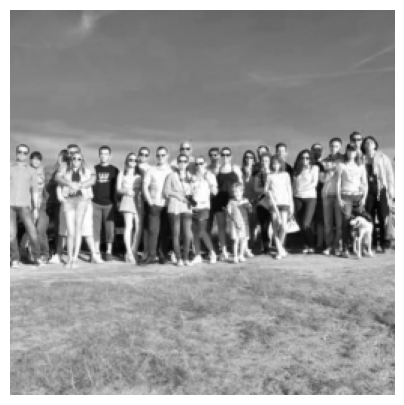

a15: 160 
ACCX: 2560 


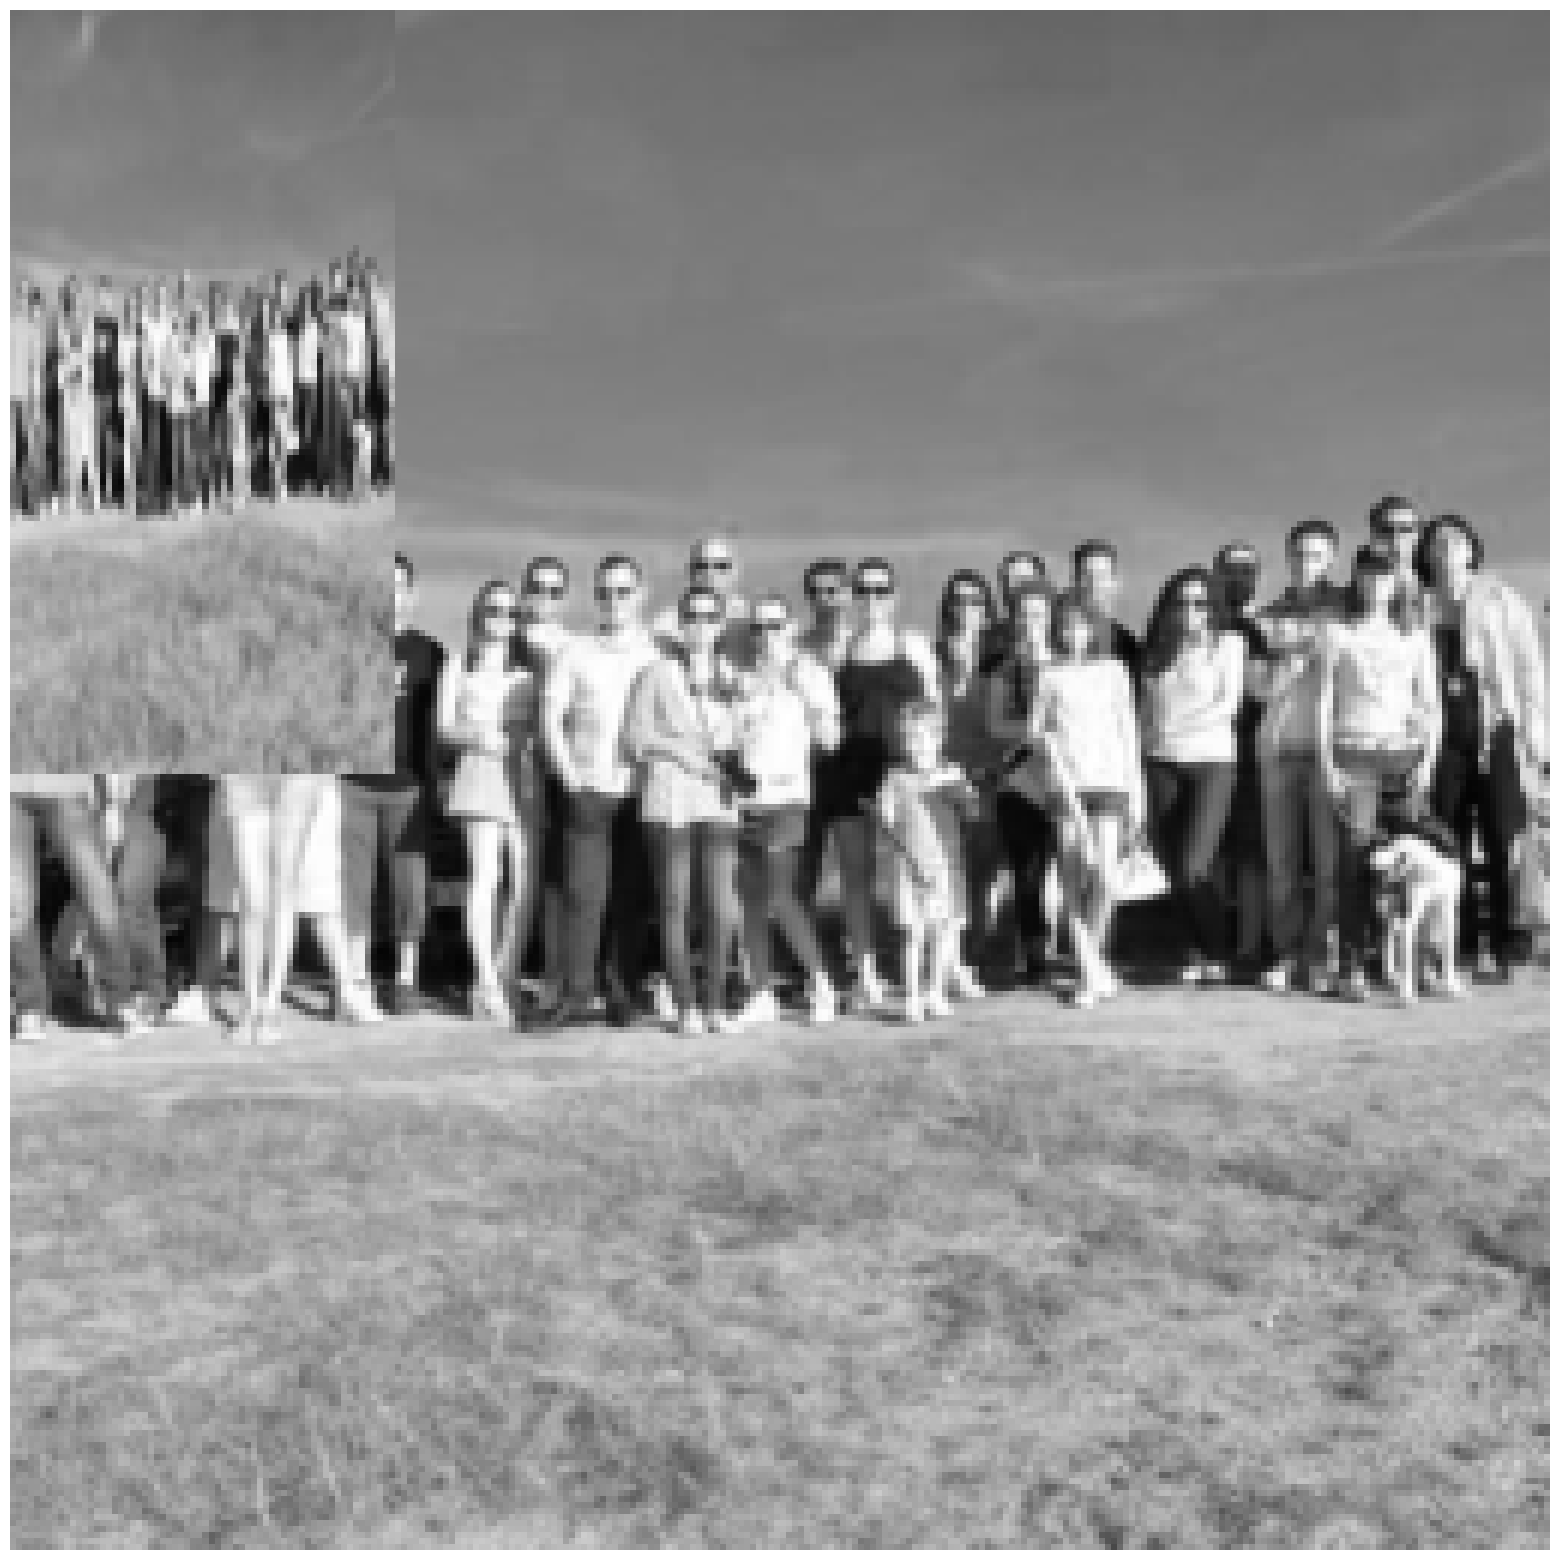

In [216]:
import os
import glob
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms.functional as TF
import share.inline as inline

core = CoreInstructionSet()
core.extend(MAC16Option())
core.extend(WindowedRegisterOption())
core.extend(ESP32S3ExtensionOption())

# a8 = load memory offset of vectors
# a9 = store memory offset of vectors
# a10 = number of vectors
# a11 = load memory offset of matrix

files = glob.glob("/home/wipkat/data/widerface/train/images/1*/*.jpg", recursive=True)
image = torchvision.io.read_image(files[13])
image = TF.center_crop(TF.resize(image, 256), 256)[0]
inline.plot(image, width=5)

image_width = 256
image_height = 256
image = image.reshape(-1)
image_size = image.shape[0]
kernel = torch.ones(16,dtype=torch.long)
kernel_size = kernel.shape[0]
memory = torch.cat((image, kernel), -1)
for i, b in enumerate(memory):
    core.memory[i] = b.item() & 0xFF

code = f"""
movi a14, {image_size}
ee.vld.128.ip q7, a14, 0
xor a4, a4, a4
xor a10, a10, a10
xor a12, a12, a12
xor a14, a14, a14

movi a13, {image_width}
movi a9, {image_width-2}

process_col:
    movi a8, {image_height-4}
    or a12, a4, a4
    or a14, a10, a10
    ee.vld.128.xp q4, a12, a13
    ee.vld.128.xp q5, a12, a13
    
accum_block:
    ee.vld.128.xp q2, a12, a13
    ee.vld.128.xp q3, a12, a13
    mv.qr q0, q4
    mv.qr q1, q5
    mv.qr q4, q2
    mv.qr q5, q3
    ee.vzip.32 q1, q3
    ee.vzip.32 q0, q2
    ee.vzip.32 q2, q3
    ee.vzip.32 q0, q1
    
    ee.zero.accx
    ee.vmulas.u8.accx q0, q7
    rur a15, ACCX
    srli a15, a15, 4
    s8i a15, a14, 0
    
    ee.zero.accx
    ee.vmulas.u8.accx q1, q7
    rur a15, ACCX
    srli a15, a15, 4
    s8i a15, a14, 1
    
    ee.zero.accx
    ee.vmulas.u8.accx q2, q7
    rur a15, ACCX
    srli a15, a15, 4
    s8i a15, a14, 2
    
    ee.zero.accx
    ee.vmulas.u8.accx q3, q7
    rur a15, ACCX
    srli a15, a15, 4
    s8i a15, a14, 3

    addi a14, a14, {image_width}
    addi a8, a8, -2
    bgez a8, accum_block
end_accum_block:

    addi a10, a10, 4
    addi a4, a4, 16
    addi a9, a9, -16
    bgez a9, process_col
end_process_col:

!dumps a15
!dumps ACCX
"""


debug = False
core.add_code(code)
while True:
    if debug:
        core.step()
        continue
    else:
        try: core.step()
        except Exception as e: 
            image = torch.tensor(core.memory[:256*256], dtype=torch.uint8)
            image = image.reshape(1,256,256)
            inline.plot(image)
            print(e)
            break